<a href="https://colab.research.google.com/github/joao-arroyo/Ciencia-de-Datos/blob/main/Data_StoryTelling_Arroyo_Solis_Joao_Alejandro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo General,Los objetivos específicos,Definición de objetivo, Contexto comercial, Problema Comercial, Contexto analítico

**Objetivo General**
1. OG1: Identificar la relación entre el género y la plataforma de los videojuegos más populares para comprender cómo esta relación influye en las ventas globales de los juegos

**Los objetivos específicos:**

1. OE1: Identificar los géneros de videojuegos más populares y las plataformas en las que tienen más ventas.
2. OE2: Analizar la relación entre los géneros de videojuegos más populares y las plataformas en las que tienen más ventas.
3. OE3: Determinar las combinaciones *de* género y plataforma que tienen un mayor nivel de ventas.
4. OE4: Proporcionar recomendaciones a los desarrolladores de videojuegos sobre cómo diseñar y comercializar sus juegos para maximizar su éxito en el mercado.


**Definición de objetivo:**

1. -¿Qué géneros de videojuegos y plataformas tienen una mayor cantidad de ventas globales?
2. -¿Cómo influye la relación entre el género y la plataforma en el éxito de ventas de los videojuegos?

**Contexto comercial: (Mi nicho de mercado)**

Identificar los factores que influyen en las ventas de los videojuegos para que los desarrolladores puedan maximizar sus ganancias.

**Problema Comercial: (Contexto del mercado, asi como analisis de competidores)**

Los desarrolladores de videojuegos buscan comprender cómo la relación entre el género y la plataforma afecta el éxito de ventas de los juegos para poder desarrollar juegos exitosos y generar mayores ganancias.


#Paso 5 (EDA) Data Storytelling



##Extracción de datos:

1.   Identificar las fuentes de datos relevantes.
2.   Obtener los datos necesarios de las fuentes identificadas.






In [ ]:
# Instalar la biblioteca pandas-profiling desde el repositorio de GitHub
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# Instalar la biblioteca missingno para visualización de datos faltantes
! pip install missingno

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
# Importación para realizar solicitudes HTTP y manipulación de archivos del sistema
import requests
import os

# Importaciones para operaciones básicas, manipulación y análisis de datos
import numpy as np
import pandas as pd
import pandas_profiling

# Importaciones para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Importar la librería missingno para visualizar patrones de valores faltantes en los dataframe
import missingno as msno

# Importaciones para interactuar con Google Colab y montar Google Drive
from openpyxl import Workbook
from google.colab import drive

# Montar Google Drive en la sesión actual de Colab para acceder a los archivos almacenados en Drive
drive.mount('/content/gdrive')

# Cambiar el directorio de trabajo actual a la ubicación donde se encuentran los datos en Google Drive
%cd '/content/gdrive/MyDrive/datos'



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/datos


In [ ]:
df1 = pd.read_excel('API_RAWG_20000_Filas.xlsx') # <- DATA DE APOYO RECOPILADA POR EL API PUBLICA RAWG "https://api.rawg.io/api/"
df2 = pd.read_excel('Video_Games_Sales_as_at_22_Dec_2016.xlsx') # <- DATASET PRINCIPAL PARA EL MODELO DE ML

In [ ]:
df1.dtypes

Nombre                      object
Rating                     float64
Fecha de lanzamiento       float64
Puntuacion(exceptional)    float64
Puntuacion(recommended)    float64
Puntuacion(meh)            float64
Puntuacion(skip)           float64
dtype: object

In [ ]:
df2.dtypes

Name                object
Platform            object
Year_of_Release     object
Genre               object
Publisher           object
NA_Sales            object
EU_Sales            object
JP_Sales            object
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count          object
Developer           object
Rating              object
dtype: object

In [ ]:
# Convertir las columnas a tipo numérico
#df2
# Convierte la columna 'Year_of_Release' al tipo de dato de fecha
df2['Year_of_Release'] = pd.to_datetime(df2['Year_of_Release'], errors='coerce')
df2['Year_of_Release'] = pd.to_numeric(df2['Year_of_Release'], errors='coerce') #luego a numerico para tener el entero

df2['NA_Sales'] = pd.to_numeric(df2['NA_Sales'], errors='coerce')
df2['EU_Sales'] = pd.to_numeric(df2['EU_Sales'], errors='coerce')
df2['JP_Sales'] = pd.to_numeric(df2['JP_Sales'], errors='coerce')
df2['Rating'] = pd.to_numeric(df2['Rating'], errors='coerce')
df2['User_Score'] = pd.to_numeric(df2['User_Score'], errors='coerce')
df2['User_Count'] = pd.to_numeric(df2['User_Count'], errors='coerce')

# Convertir la columna "Genre" a cadenas de texto
df2['Genre'] = df2['Genre'].astype(str)

In [ ]:
df2.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating             float64
dtype: object

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count', 'User_Score', 'Rating']
numeric_df = df2[numeric_columns]

# Seleccionar solo las columnas no numéricas
non_numeric_columns = ['Name', 'Platform', 'Genre', 'Publisher', 'Developer']
non_numeric_df = df2[non_numeric_columns]

##Análisis exploratorio inicial:

1.   Visualizar los datos utilizando gráficos y diagramas.
2.   Calcular estadísticas descriptivas de las variables.




In [ ]:
df2

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2016    Simulation   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0         41.36     28.96      3.77         8.45         82.53  
1         29.08      3.58      6.81         0.77         40.24  
2         15.68     12.76      3.79         3.29         35.52  
3         15.61     10.93      3.28         2.95         32.77  
4         11.27      8.89     10.22         1.00         31.37  
...         ...       ...       ...          ...           ...  
16714      0.00      0.00      0.01         0.00          0.01  
16715      0.00      0.01      0.00         0.00          0.01  
16716      0.00      0.00      0.01         0.00          0.01  
16717      0.01      0.00      0.00         0.00          0.01  
16718      0.00      0.00      0.01         0.00          0.01  

[16304 rows x 9 columns]

punto 1 :  Matriz de valores faltantes que te permite visualizar la presencia de datos faltantes en tu conjunto de datos

<Axes: >

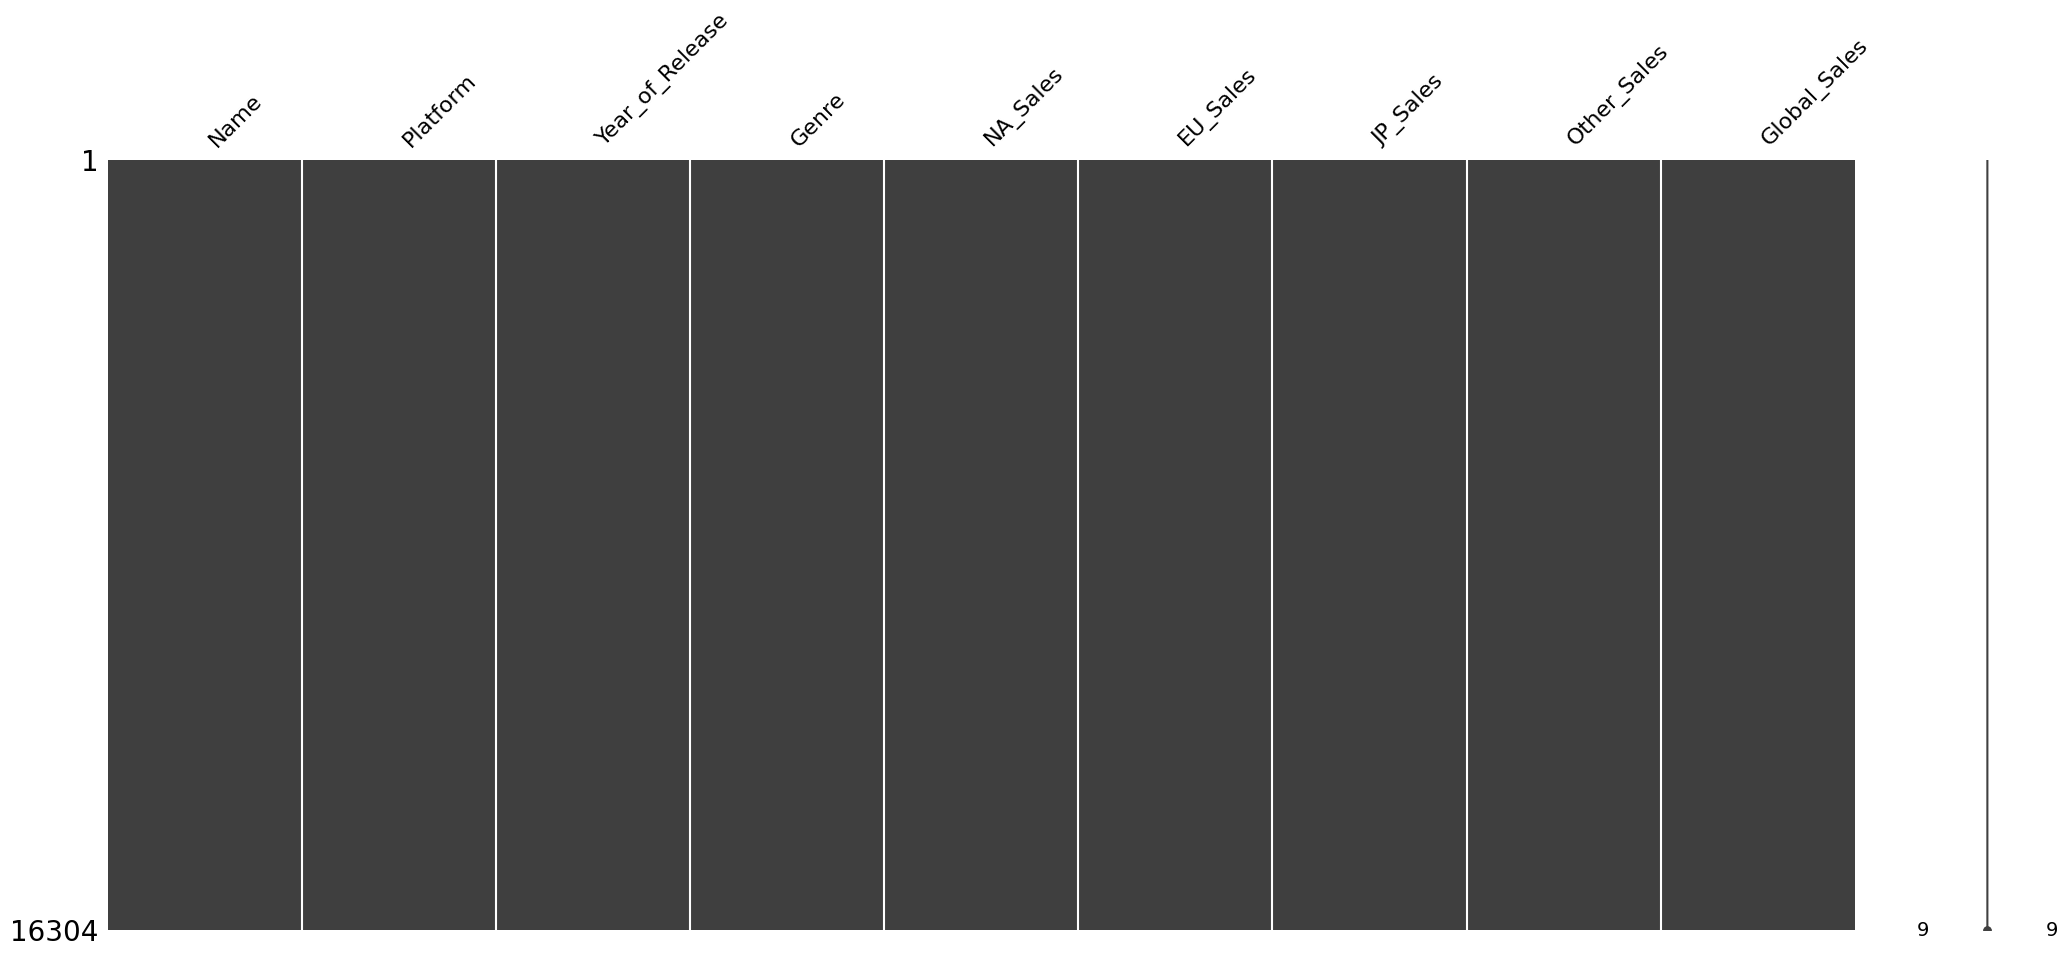

In [ ]:
msno.matrix(df2)

punto 2: Las estadísticas descriptivas incluyen el recuento, la media, la desviación estándar, el valor mínimo, los percentiles (25%, 50% y 75%) y el valor máximo de cada variable numérica.

In [ ]:
# Calcular estadísticas descriptivas
descriptive_stats = numeric_df.describe()

# Imprimir las estadísticas descriptivas
descriptive_stats


NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales  \
count  16590.000000  16664.000000  16687.000000  16693.000000  16693.000000   
mean       0.990435      0.145565      0.077905      0.047784      0.532739   
std       38.169154      0.504061      0.309096      0.187279      1.549222   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.060000   
50%        0.080000      0.020000      0.000000      0.010000      0.170000   
75%        0.240000      0.110000      0.040000      0.030000      0.470000   
max     2008.000000     28.960000     10.220000     10.570000     82.530000   

       Critic_Score  Critic_Count    User_Count   User_Score     Rating  
count   8215.000000   8160.000000   7586.000000  7594.000000   2.000000  
mean      68.059565     26.396737    161.883944     7.192859  16.000000  
std       15.931315     19.122949    561.207911     2.301267   1.414214  
min        0.000000      0.000000      3.700000     0.000000  15.000000  
25%       60.000000     12.000000     10.000000     6.400000  15.500000  
50%       70.000000     21.000000     24.000000     7.500000  16.000000  
75%       79.000000     36.000000     81.000000     8.200000  16.500000  
max       98.000000    113.000000  10665.000000    78.000000  17.000000

 Información como el recuento de valores únicos, la categoría más común y la frecuencia de la categoría más común para cada columna no numérica.

In [ ]:
# Calcular estadísticas descriptivas
descriptive_stats = non_numeric_df.describe(include='object')

# Imprimir las estadísticas descriptivas
descriptive_stats


Name Platform   Genre        Publisher Developer
count    16717    16693   16719            16640     10084
unique   11540      104      45              605      1714
top     Steins      PS2  Action  Electronic Arts   Ubisoft
freq        12     2143    3347             1356       204

##Identificación de patrones y tendencias:
1. Analizar la distribución de las variables.
2. Identificar correlaciones entre variables.
3. Detectar valores atípicos o anomalías en los datos.


punto 1: Se utiliza la biblioteca seaborn para crear una matriz de dispersión (pairplot) que muestra gráficos de dispersión de todas las combinaciones posibles de las variables numéricas seleccionadas. Esto permite visualizar las relaciones y patrones entre las variables y obtener una idea de su distribución y posible correlación

Matriz de dispercion de datos numericos

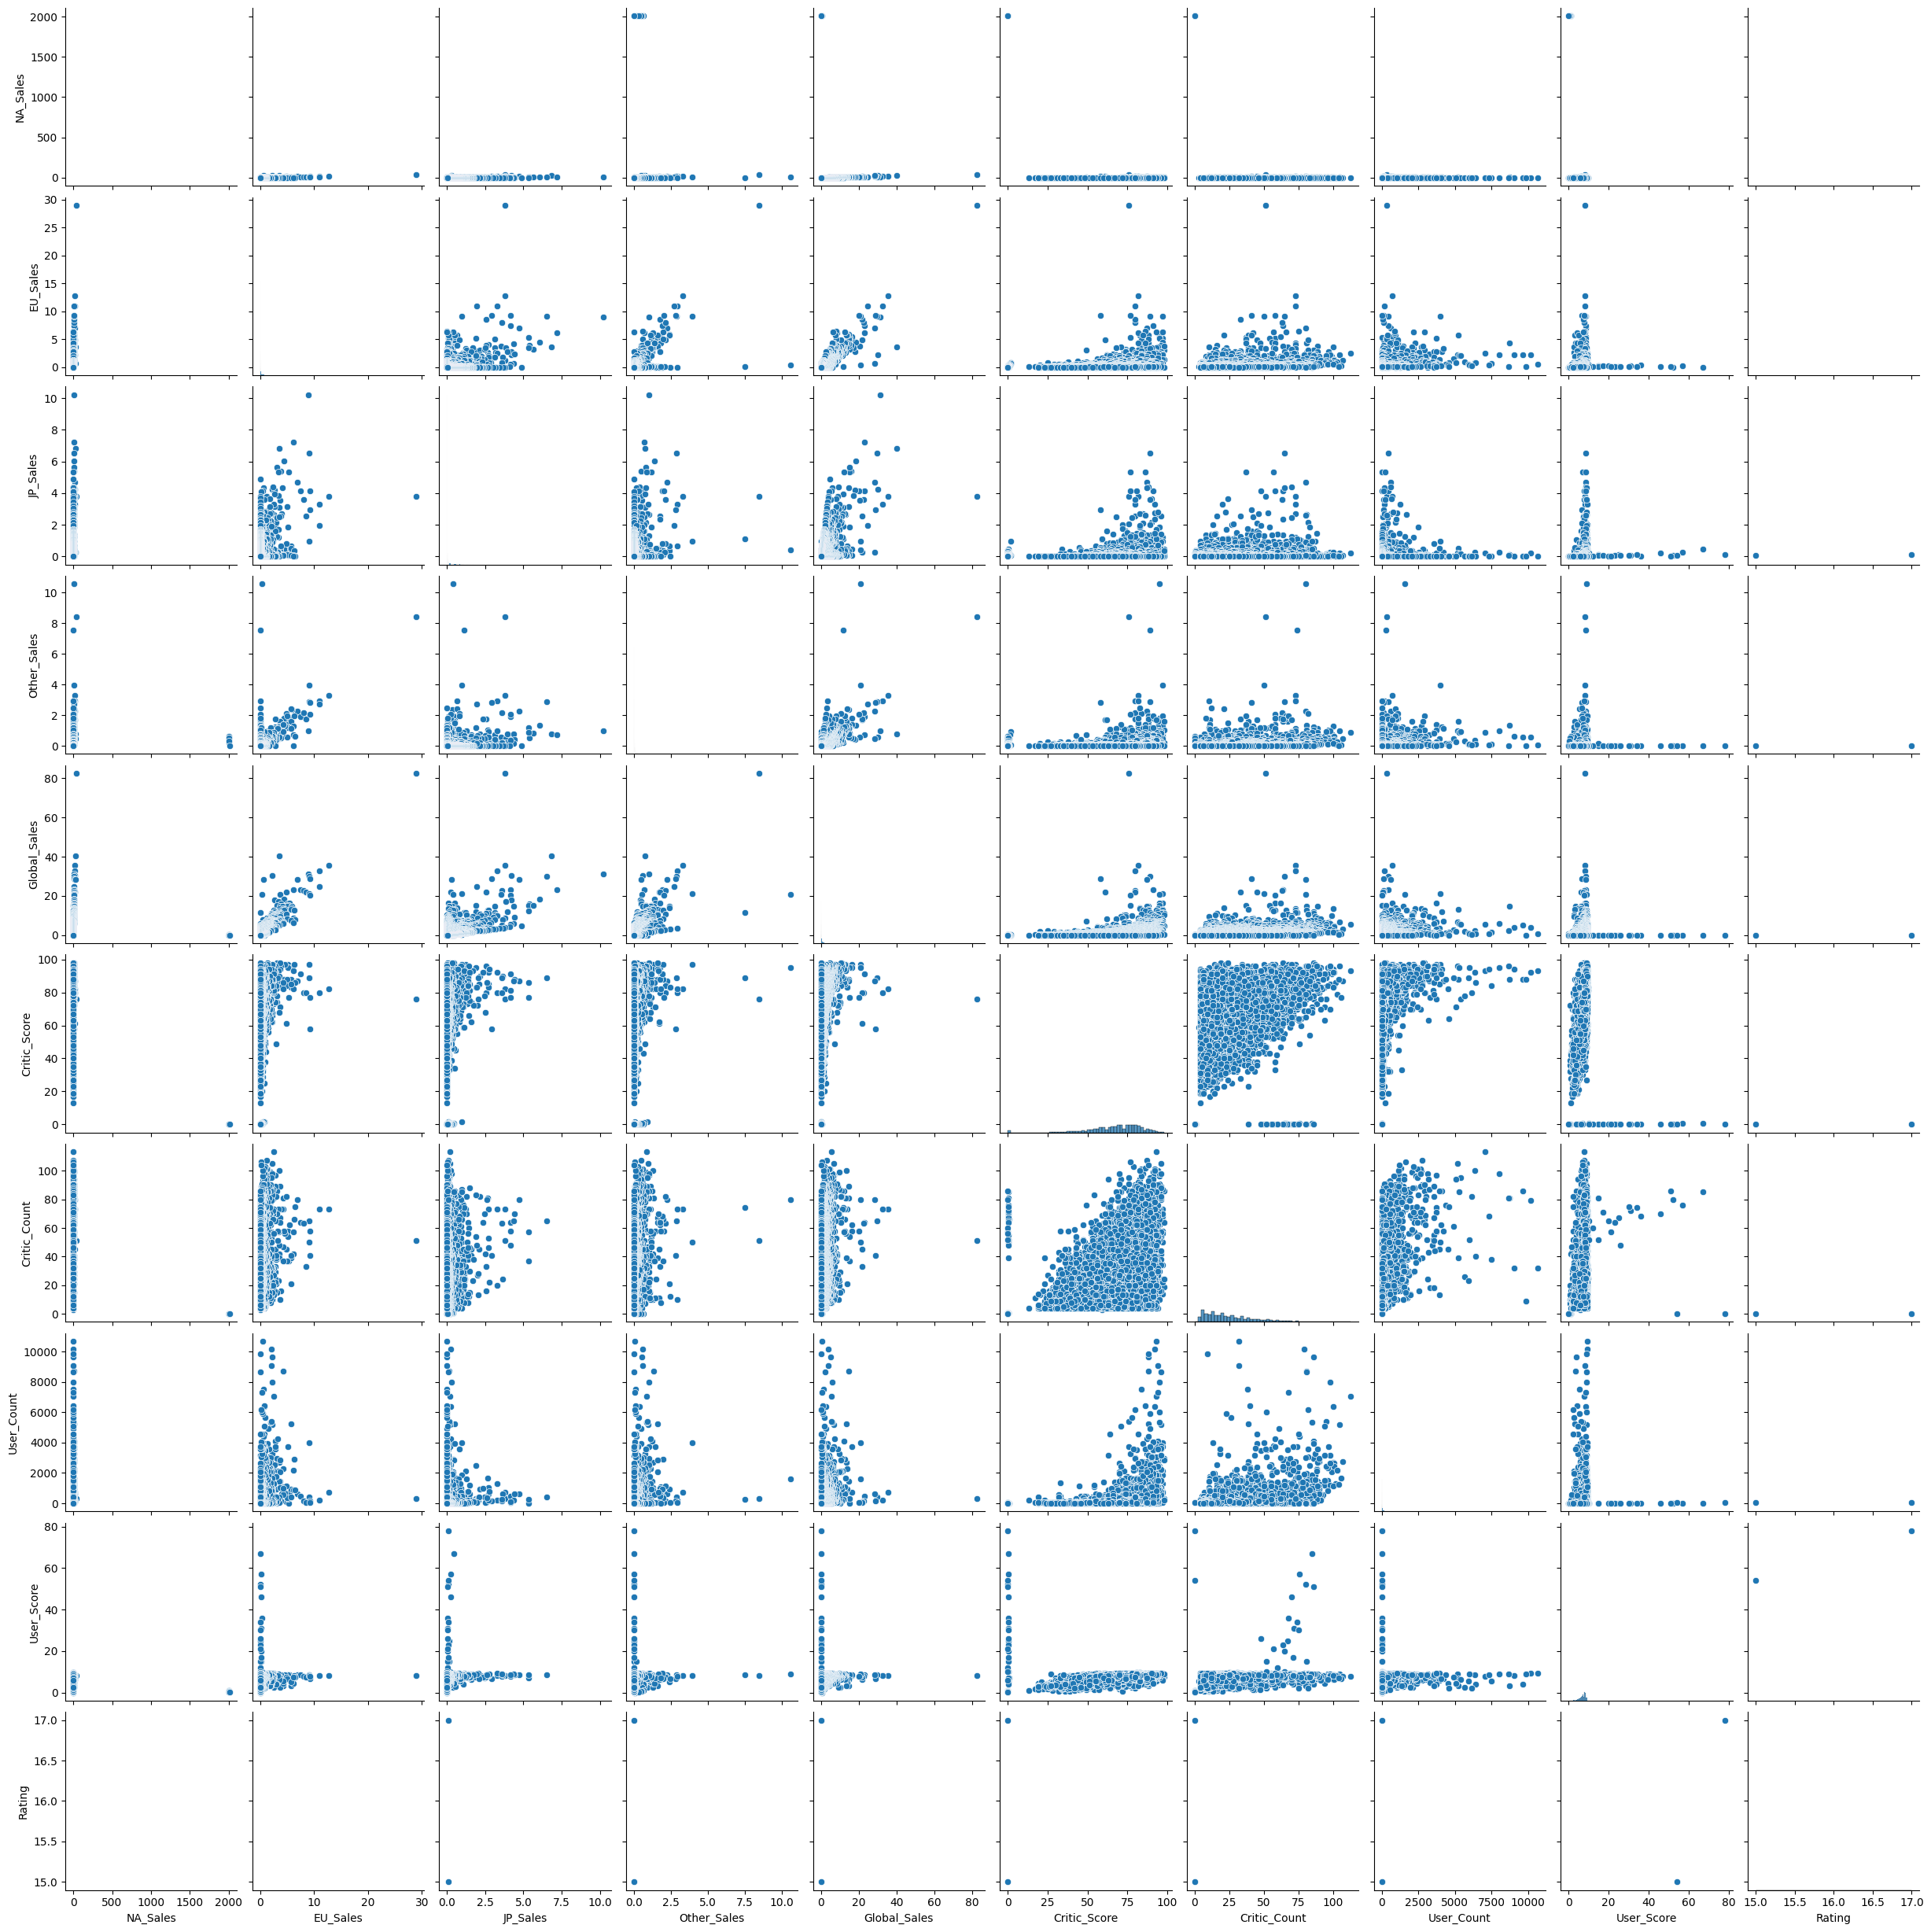

In [ ]:
# Crear la matriz de dispersión
sns.pairplot(numeric_df)
plt.show()


Relaciones entre columnas no numéricas

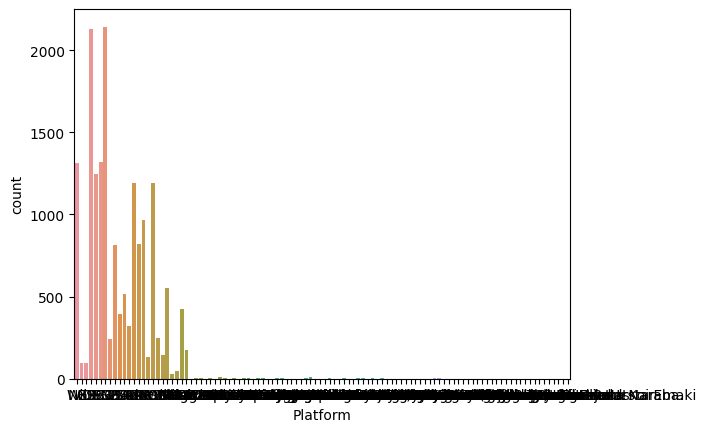

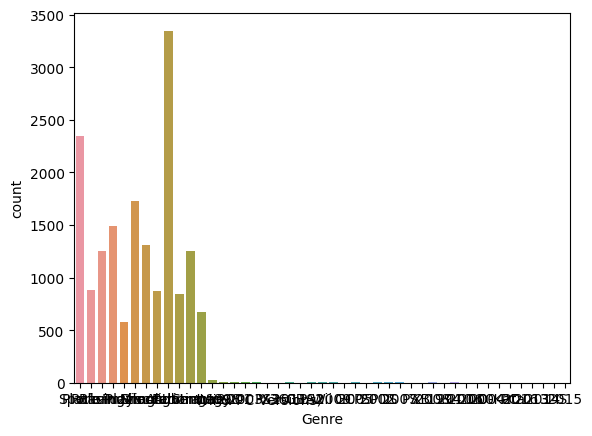

In [ ]:
# Utiliza sns.countplot() para un gráfico de barras con la columna Plataforma y Genero
sns.countplot(data=non_numeric_df, x='Platform')
plt.show()

sns.countplot(data=non_numeric_df, x='Genre')
plt.show()

El mapa de calor mostrará los coeficientes de correlación entre todas las combinaciones posibles de variables numéricas. Los valores más cercanos a 1 indican una correlación positiva fuerte, mientras que los valores cercanos a -1 indican una correlación negativa fuerte.

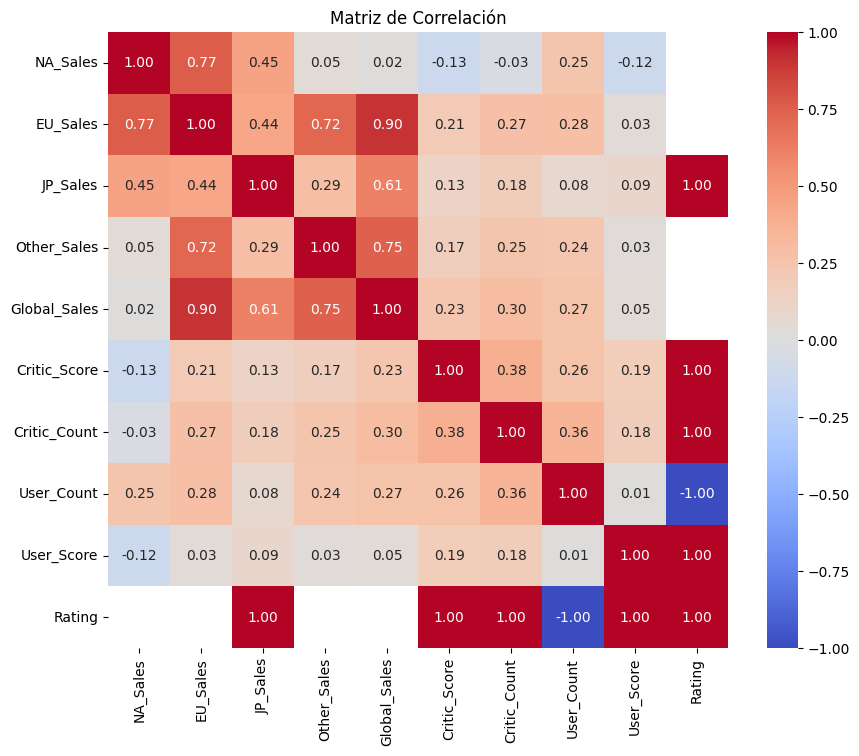

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


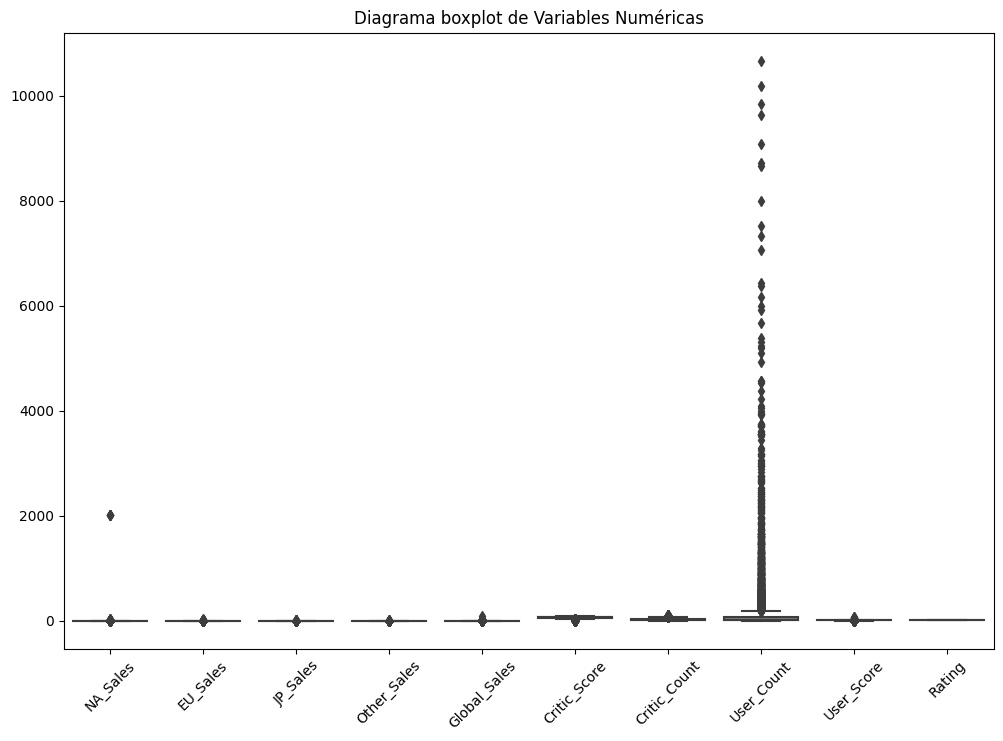

In [ ]:
# Crear el diagrama boxplot
fig = plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df)
plt.title('Diagrama boxplot de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()


Este gráfico de dispersión múltiplepermite visualizar la distribución y relación de todas las columnas numéricas en un solo gráfico, lo que puede ayudar a identificar patrones, correlaciones o posibles valores atípicos en los datos.

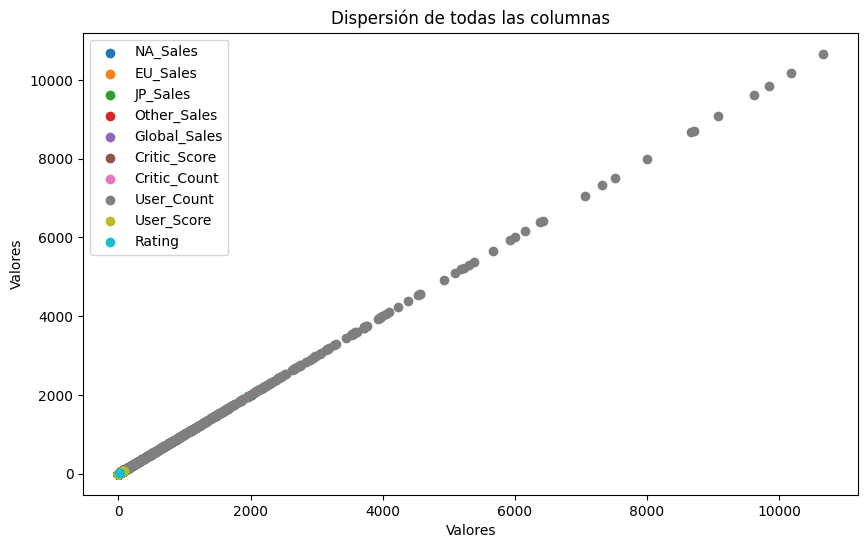

In [ ]:
# Crea un gráfico de dispersión múltiple
fig, ax = plt.subplots(figsize=(10, 6))
for column in numeric_df:
    ax.scatter(df2[column], df2[column], label=column)

# Personaliza el gráfico
ax.set_xlabel('Valores')
ax.set_ylabel('Valores')
ax.set_title('Dispersión de todas las columnas')

# Agrega una leyenda
ax.legend()

# Muestra el gráfico
plt.show()

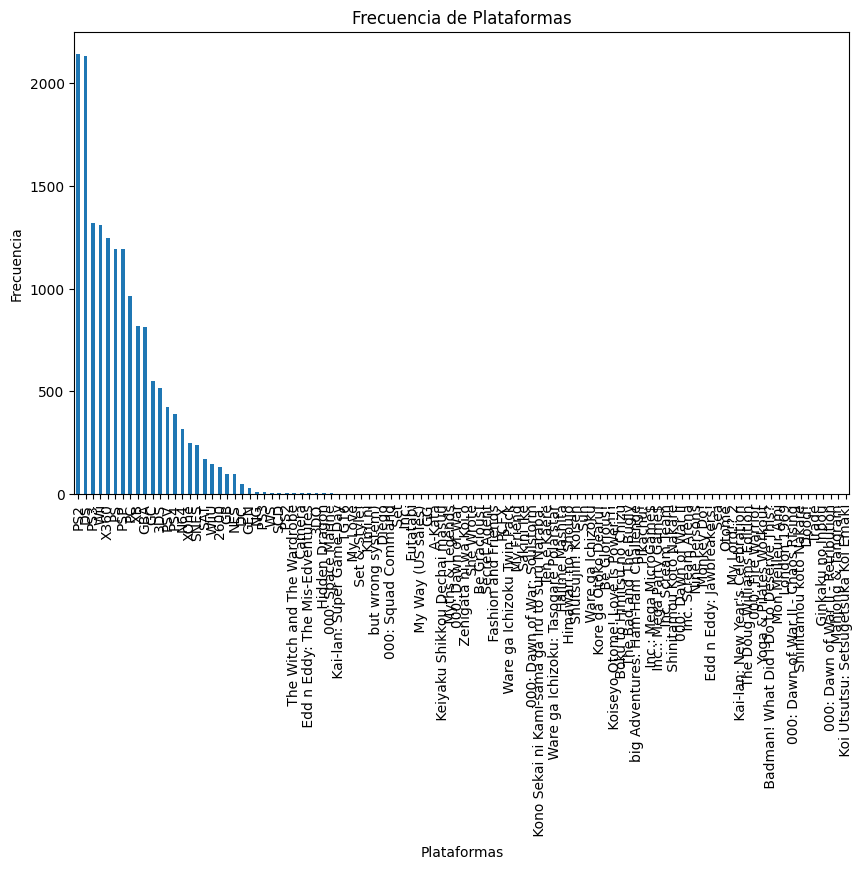

In [ ]:
# Crear el gráfico de barras para la columna "Platform"
plt.figure(figsize=(10, 6))
df2['Platform'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Plataformas')
plt.xlabel('Plataformas')
plt.ylabel('Frecuencia')
plt.show()


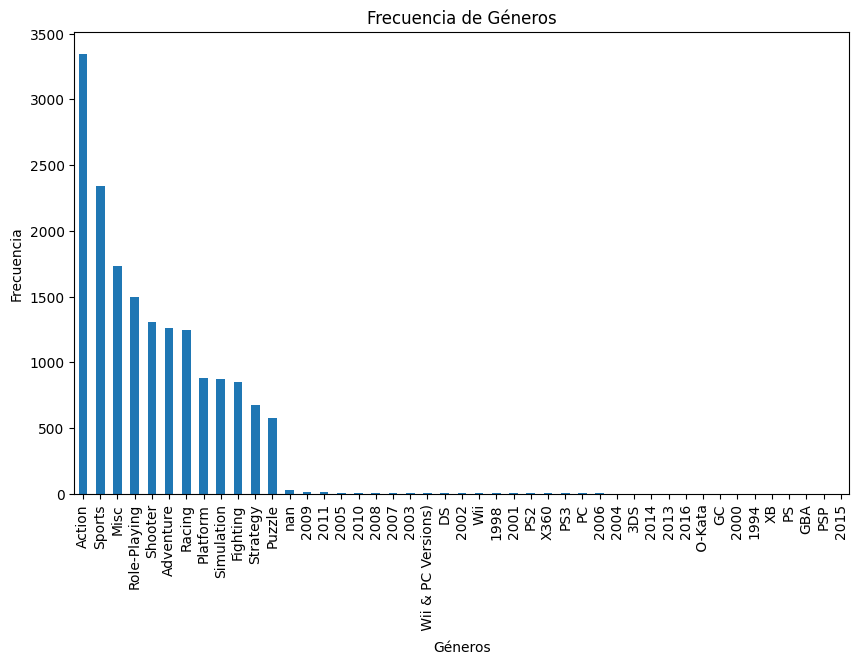

In [ ]:
# Crear el gráfico de barras para la columna "Genre"
plt.figure(figsize=(10, 6))
df2['Genre'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Géneros')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.show()

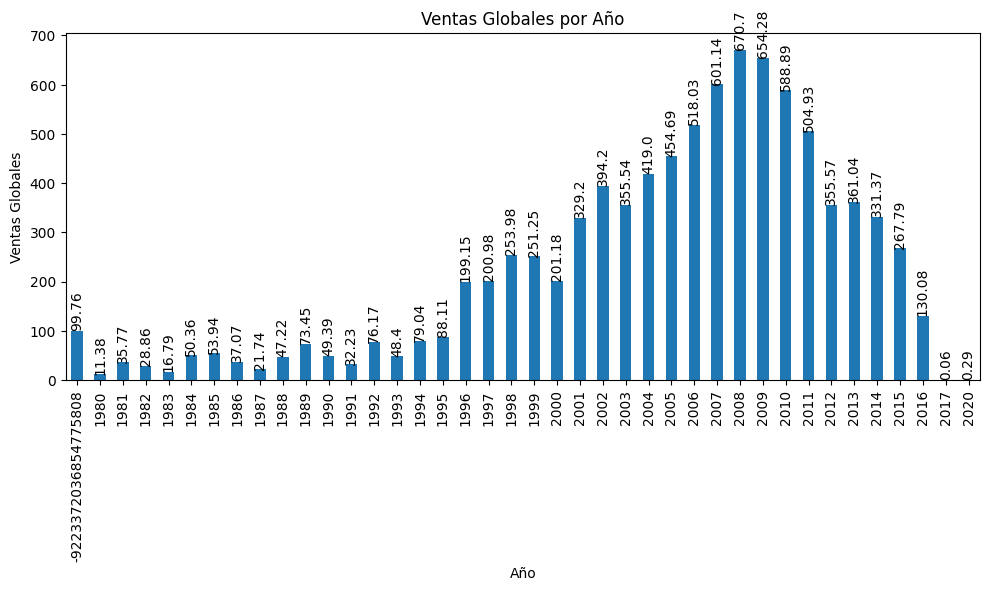

In [ ]:
 # Agrupar las ventas globales por año
sales_by_year = df2.groupby('Year_of_Release')['Global_Sales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar')

# Configurar los ejes
plt.title('Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')

# Mostrar solo el año en el eje x
#plt.xticks(range(len(sales_by_year.index)), [str(int(year)) for year in sales_by_year.index], rotation=90, ha='right')

# Mostrar el valor de cada barra de forma vertical
for i, sales in enumerate(sales_by_year):
    plt.annotate(str(round(sales, 2)), xy=(i, sales), ha='center', va='bottom', rotation='vertical')

plt.tight_layout()
plt.show()


In [ ]:
# Ordenar las ventas de mayor a menor
sales_by_year = sales_by_year.sort_values(ascending=False)

# Imprimir la tabla de ventas globales por año
print("Ventas Globales por Año")
print("------------------------")
print(sales_by_year)

Ventas Globales por Año
------------------------
Year_of_Release
 2008                   670.70
 2009                   654.28
 2007                   601.14
 2010                   588.89
 2006                   518.03
 2011                   504.93
 2005                   454.69
 2004                   419.00
 2002                   394.20
 2013                   361.04
 2012                   355.57
 2003                   355.54
 2014                   331.37
 2001                   329.20
 2015                   267.79
 1998                   253.98
 1999                   251.25
 2000                   201.18
 1997                   200.98
 1996                   199.15
 2016                   130.08
-9223372036854775808     99.76
 1995                    88.11
 1994                    79.04
 1992                    76.17
 1989                    73.45
 1985                    53.94
 1984                    50.36
 1990                    49.39
 1993                    48.40
 1988

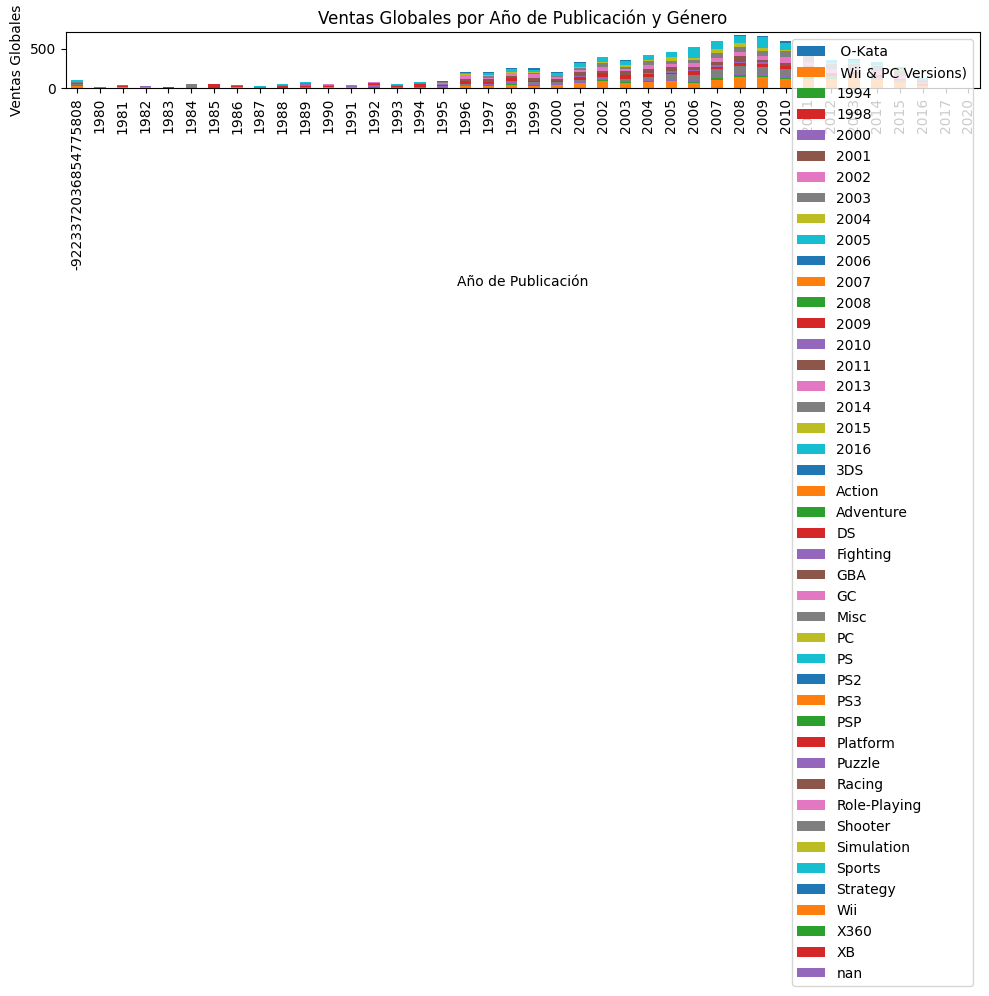

In [ ]:
# Agrupar las ventas globales por año de publicación y género
sales_by_year_genre = df2.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack()

# Crear el gráfico de barras agrupado
sales_by_year_genre.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar los ejes y el título
plt.title('Ventas Globales por Año de Publicación y Género')
plt.xlabel('Año de Publicación')
plt.ylabel('Ventas Globales')

# Mostrar la leyenda
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


<ipython-input-19-affd5a998483>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


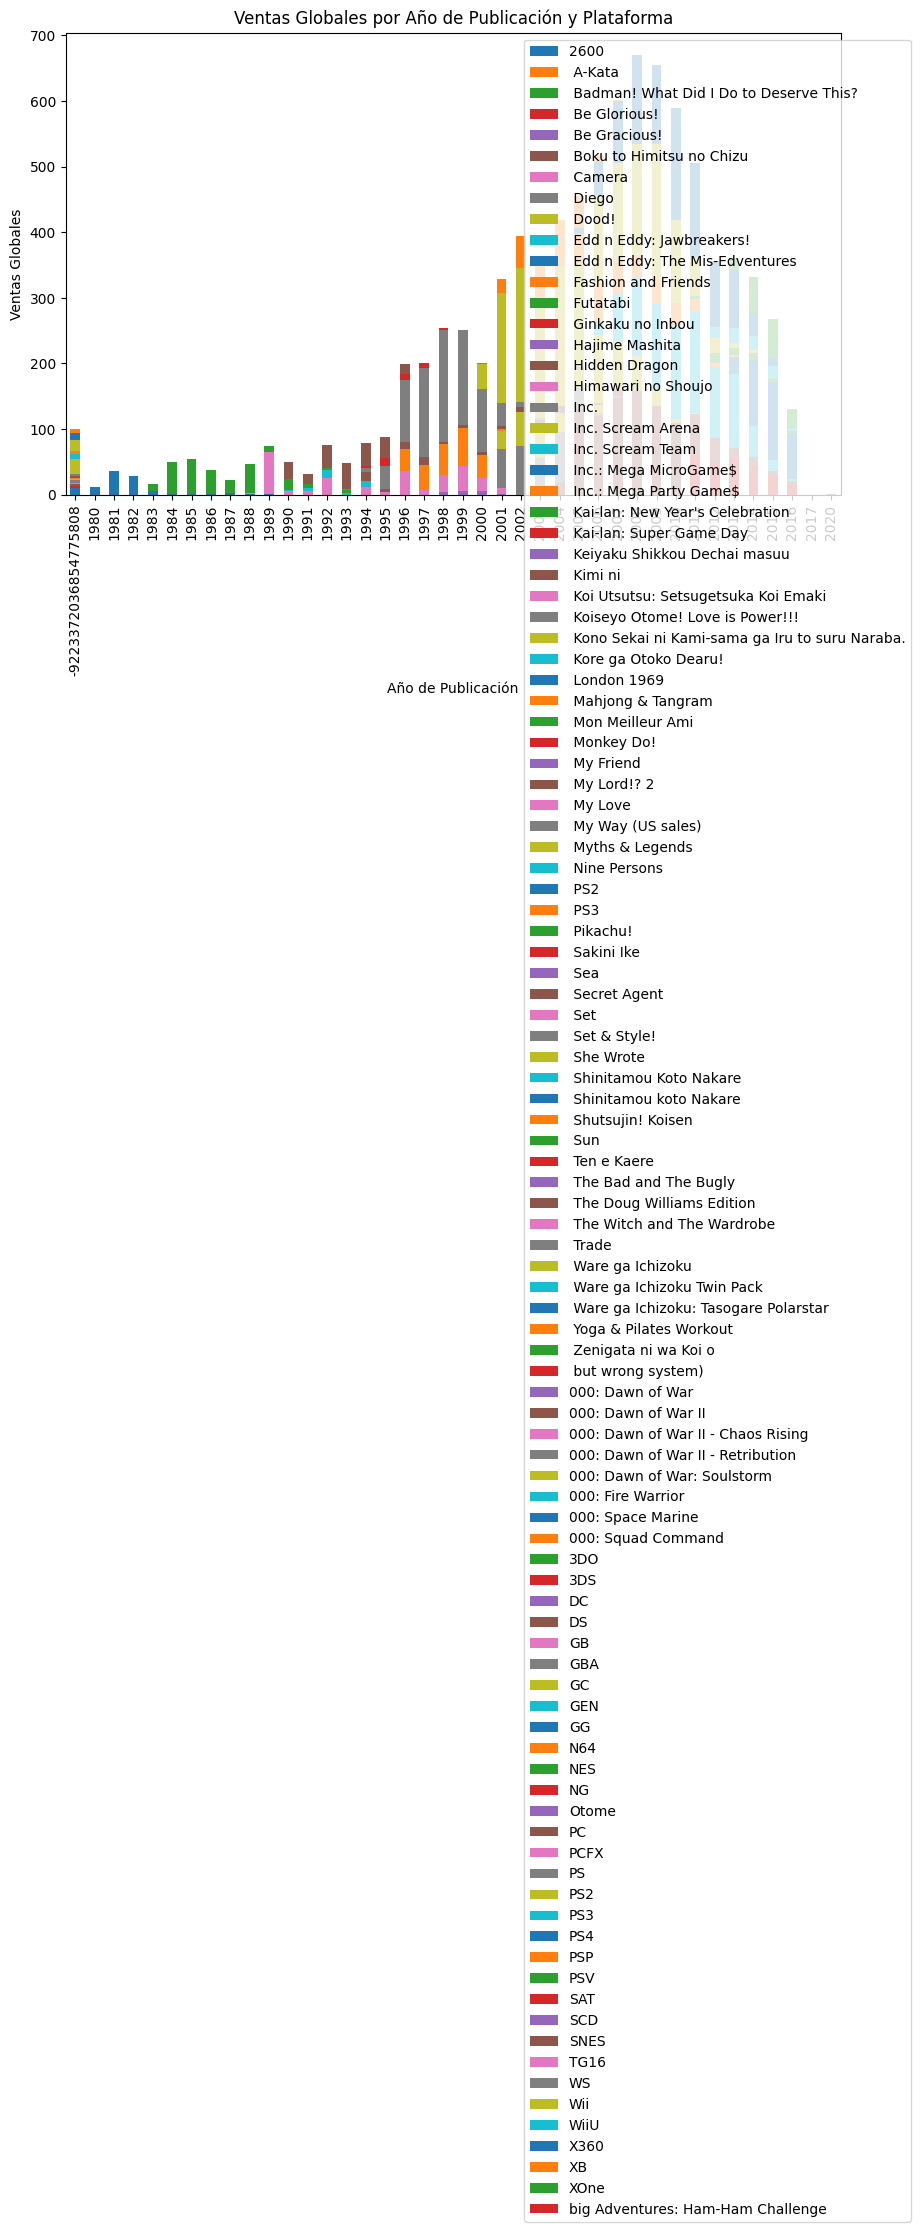

In [ ]:
# Agrupar las ventas globales por año de publicación y plataforma
sales_by_year_platform = df2.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum().unstack()

# Crear el gráfico de barras agrupado
sales_by_year_platform.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar los ejes y el título
plt.title('Ventas Globales por Año de Publicación y Plataforma')
plt.xlabel('Año de Publicación')
plt.ylabel('Ventas Globales')

# Mostrar la leyenda
#plt.legend(loc='best') #upper right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()


Dataframe "df2" antes del tratamiento de la data

In [ ]:
df2

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2016    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count  User_Score  User_Count Developer  Rating  
0              76.0          51.0         8.0       322.0  Nintendo     NaN  
1               NaN           NaN         NaN         NaN       NaN     NaN  
2              82.0          73.0         8.3       709.0  Nintendo     NaN  
3              80.0          73.0         8.0       192.0  Nintendo     NaN  
4               NaN           NaN         NaN         NaN       NaN     NaN  
...             ...           ...         ...         ...       ...     ...  
16714           NaN           NaN         NaN         NaN       NaN     NaN  
16715           NaN           NaN         NaN         NaN       NaN     NaN  
16716           NaN           NaN         NaN         NaN       NaN     NaN  
16717           NaN           NaN         NaN         NaN       NaN     NaN  
16718           NaN           NaN         NaN         NaN       NaN     NaN  

[16719 rows x 16 columns]

##Tratamiento de valores atípicos y datos faltantes:
1. Evaluar y tratar los valores atípicos según corresponda.


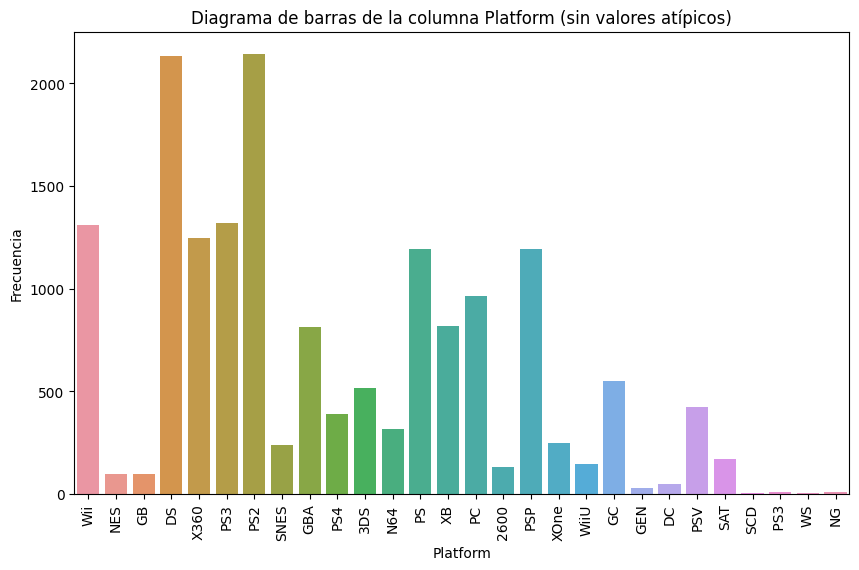

In [ ]:
# Calcula la frecuencia de cada categoría en la columna "Platform"
category_counts = df2['Platform'].value_counts()

# Define un umbral para determinar los valores atípicos
threshold = 5.5

# Filtra las categorías que tienen una frecuencia menor al umbral
atipicos = category_counts[category_counts < threshold].index.tolist()

# Filtra el DataFrame original eliminando los valores atípicos en la columna "Platform"
df_filtered = df2[~df2['Platform'].isin(atipicos)]

# Elimina las filas de df2 que no están presentes en df_filtered
df2 = df2[df2['Platform'].isin(df_filtered['Platform'])]

# Grafica el diagrama de barras de la columna "Platform" sin los valores atípicos
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Platform')

# Personaliza el gráfico
plt.title("Diagrama de barras de la columna Platform (sin valores atípicos)")
plt.xlabel("Platform")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()


In [ ]:
df2

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2016    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count  User_Score  User_Count Developer  Rating  
0              76.0          51.0         8.0       322.0  Nintendo     NaN  
1               NaN           NaN         NaN         NaN       NaN     NaN  
2              82.0          73.0         8.3       709.0  Nintendo     NaN  
3              80.0          73.0         8.0       192.0  Nintendo     NaN  
4               NaN           NaN         NaN         NaN       NaN     NaN  
...             ...           ...         ...         ...       ...     ...  
16714           NaN           NaN         NaN         NaN       NaN     NaN  
16715           NaN           NaN         NaN         NaN       NaN     NaN  
16716           NaN           NaN         NaN         NaN       NaN     NaN  
16717           NaN           NaN         NaN         NaN       NaN     NaN  
16718           NaN           NaN         NaN         NaN       NaN     NaN  

[16612 rows x 16 columns]

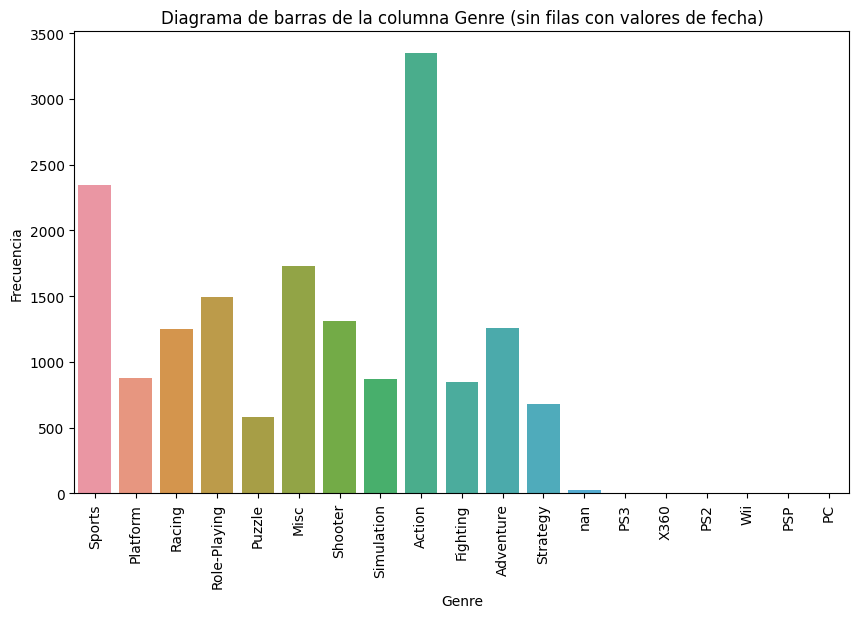

DataFrame filtrado sin filas con valores de fecha en la columna Genre:
                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV    

In [ ]:
# Convertir la columna "Genre" a cadenas de texto
#df2['Genre'] = df2['Genre'].astype(str)

# Filtra las filas que no corresponden a géneros de videojuegos
df_filtered = df2[~df2['Genre'].str.contains('\d{4}', regex=True)]

# Grafica el diagrama de barras de la columna "Genre" sin las filas con valores de fecha
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Genre')

# Personaliza el gráfico
plt.title("Diagrama de barras de la columna Genre (sin filas con valores de fecha)")
plt.xlabel("Genre")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

# Elimina las filas de df2 que no están presentes en df_filtered
df2 = df2[df2['Genre'].isin(df_filtered['Genre'])]

# Muestra el gráfico
plt.show()

# Imprime el DataFrame filtrado sin las filas con valores de fecha en la columna "Genre"
print("DataFrame filtrado sin filas con valores de fecha en la columna Genre:")
print(df_filtered)



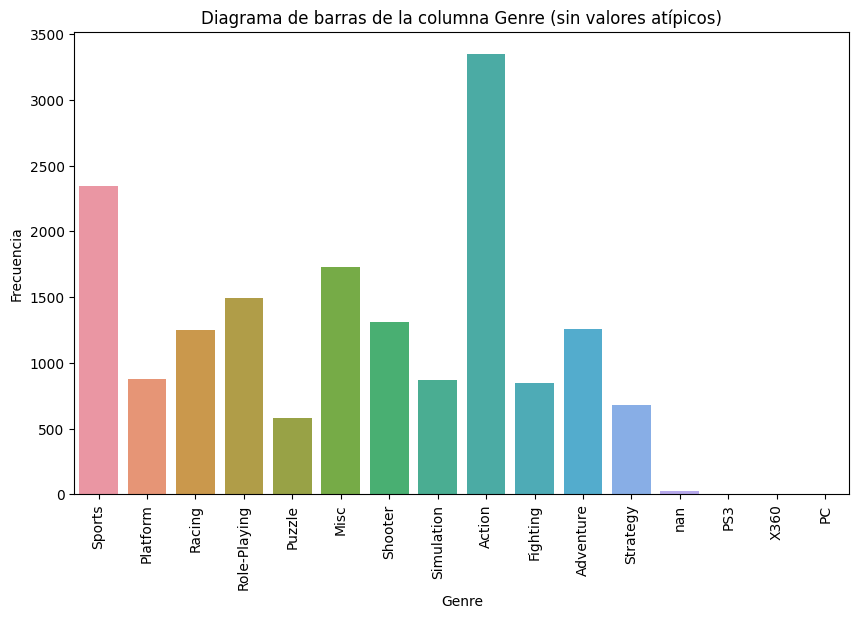

DataFrame filtrado sin valores atípicos en la columna Genre:
                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16715               LMA Manager 2007     X360             2006        Sports   
16716        Haitaka no Psychedelica      PSV             2016     Adventure   
16717               Spirits & Spells      GBA             2003      Platform   
16718            Winning Post 8 2016      PSV             2

In [ ]:
# Calcula la frecuencia de cada categoría en la columna "Genre"
category_counts = df2['Genre'].value_counts()

# Define un umbral para determinar los valores atípicos
threshold = 2

# Filtra las categorías que tienen una frecuencia menor al umbral
atipicos = category_counts[category_counts < threshold].index.tolist()

# Filtra el DataFrame original eliminando los valores atípicos en la columna "Genre"
df_filtered = df2[~df2['Genre'].isin(atipicos)]

# Grafica el diagrama de barras de la columna "Genre" sin los valores atípicos
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='Genre')

# Personaliza el gráfico
plt.title("Diagrama de barras de la columna Genre (sin valores atípicos)")
plt.xlabel("Genre")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)

# Elimina las filas de df2 que no están presentes en df_filtered
df2 = df2[df2['Genre'].isin(df_filtered['Genre'])]

# Muestra el gráfico
plt.show()

# Imprime el DataFrame filtrado sin los valores atípicos en la columna "Genre"
print("DataFrame filtrado sin valores atípicos en la columna Genre:")
print(df_filtered)



##Manejar los datos faltantes mediante técnicas de imputación o eliminación.


<Axes: >

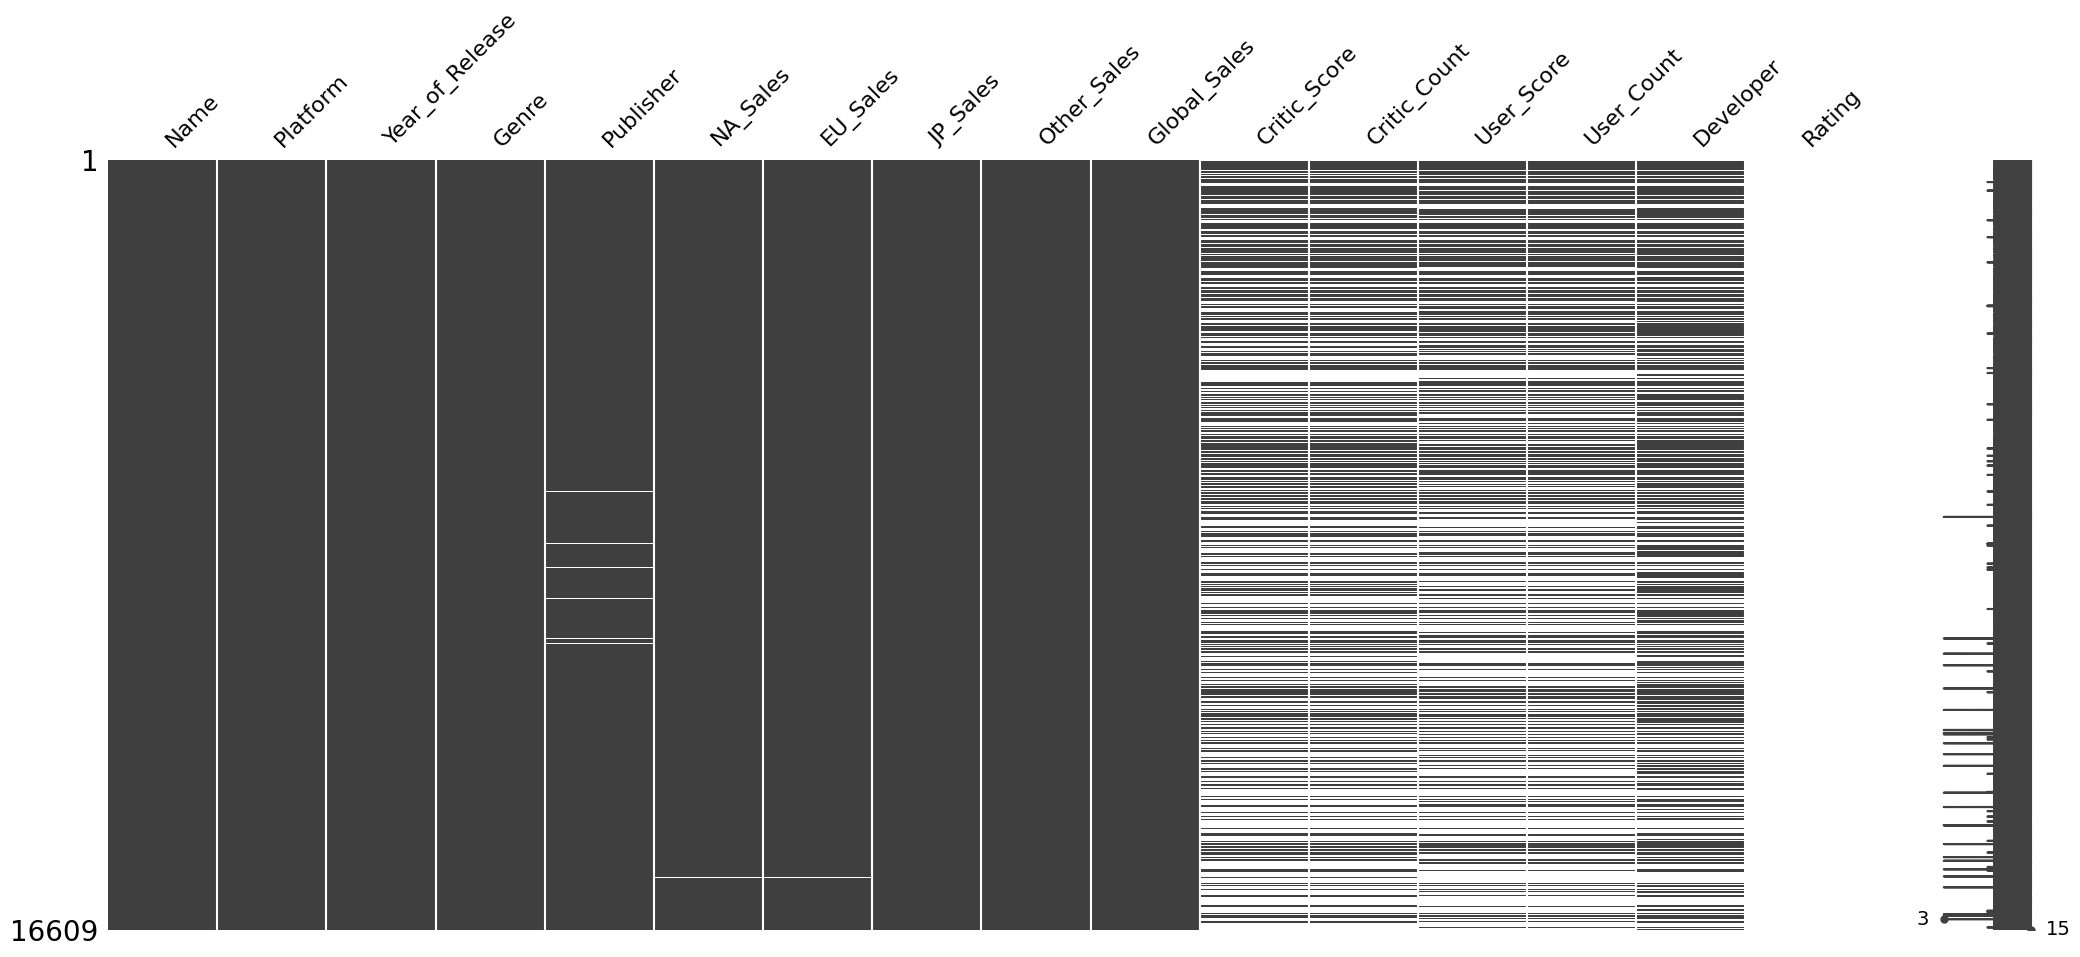

In [ ]:
msno.matrix(df2)

In [ ]:
print(df2.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


In [ ]:
# Eliminar las columnas indicadas del dataframe df2 por falta de datos que ayuden al modelo de ML
df2 = df2.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1)
df2 = df2.drop([ 'Publisher'], axis=1)


In [ ]:
print(df2.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


In [ ]:
#Eliminar nulos
df2 = df2.dropna(subset=['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']) #, 'Publisher'


In [ ]:
# Filtrar las filas con fechas entre 1980 y 2016 utilizando indexación booleana
df2 = df2[(df2['Year_of_Release'] >= 1980) & (df2['Year_of_Release'] <= 2016)]

<Axes: >

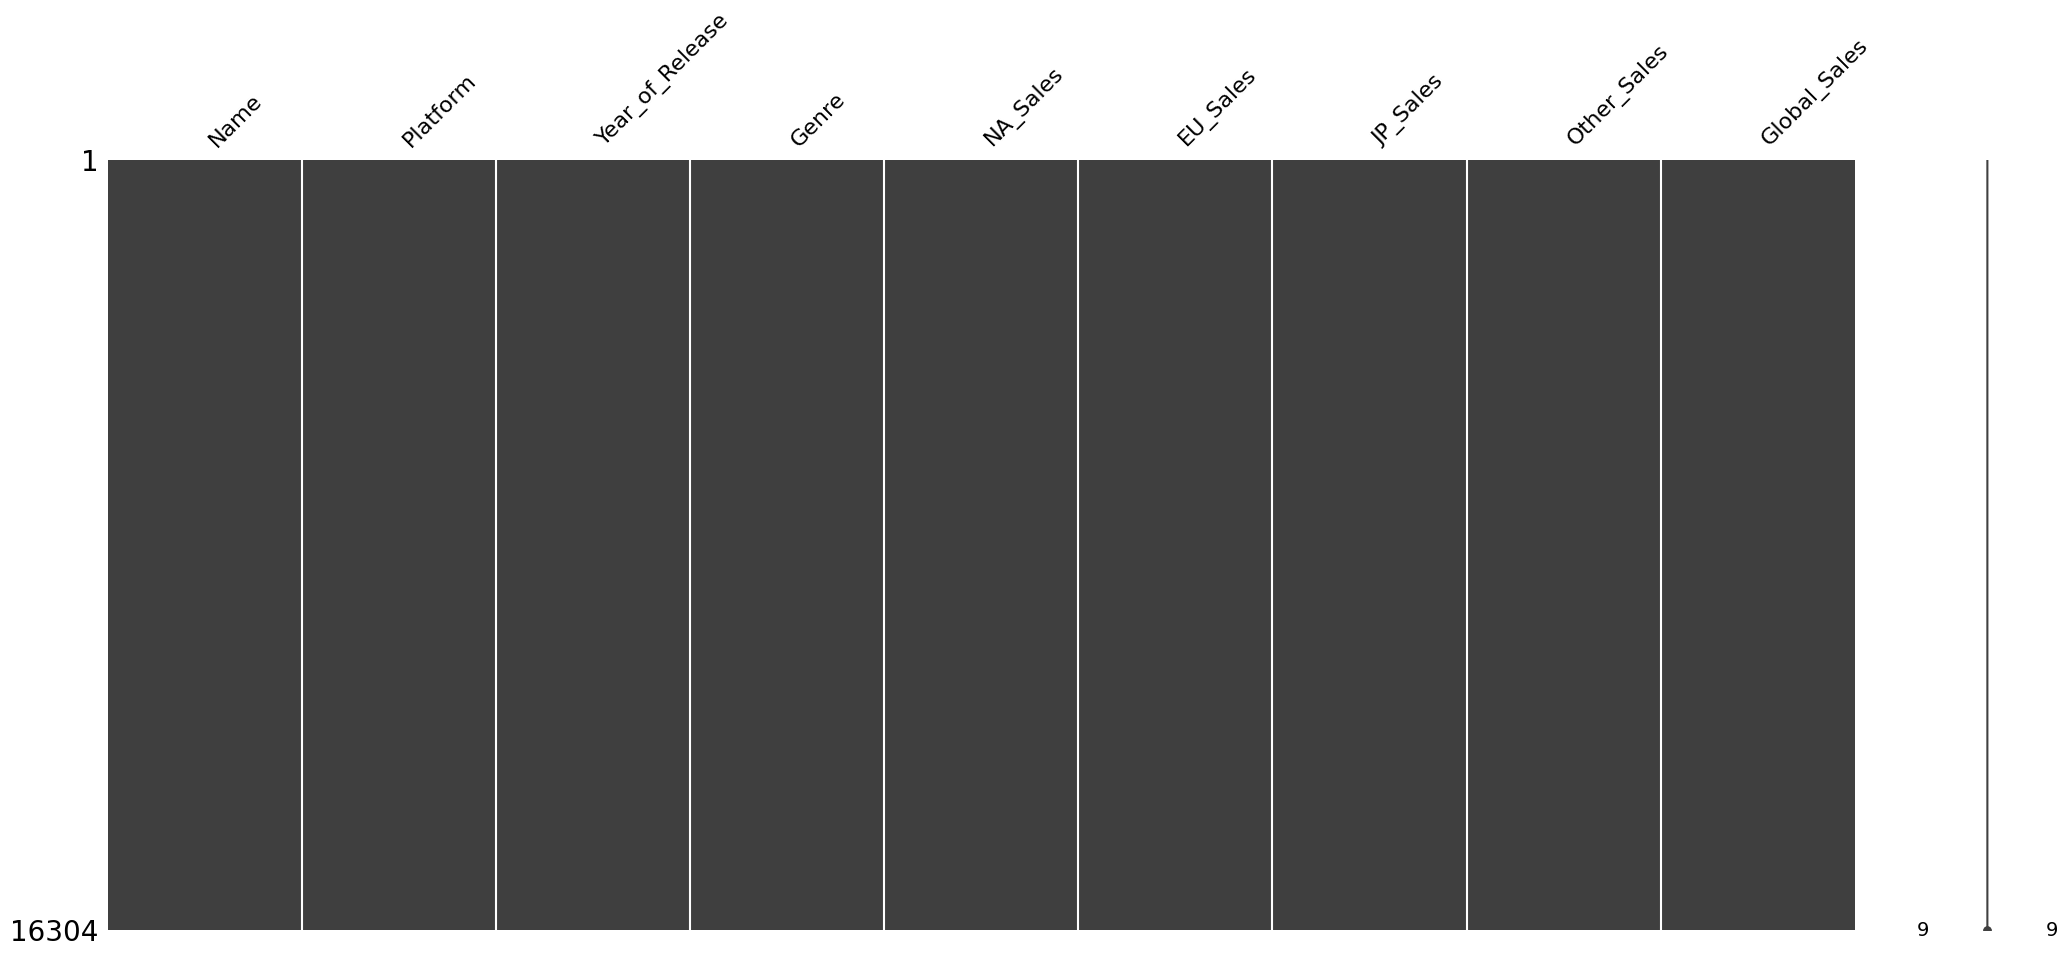

In [ ]:
msno.matrix(df2)

##Análisis más detallado:
1. Realizar análisis bivariado y multivariado para explorar relaciones entre variables.
2. Aplicar técnicas de visualización avanzadas, como gráficos de dispersión, diagramas de caja y diagramas de correlación.


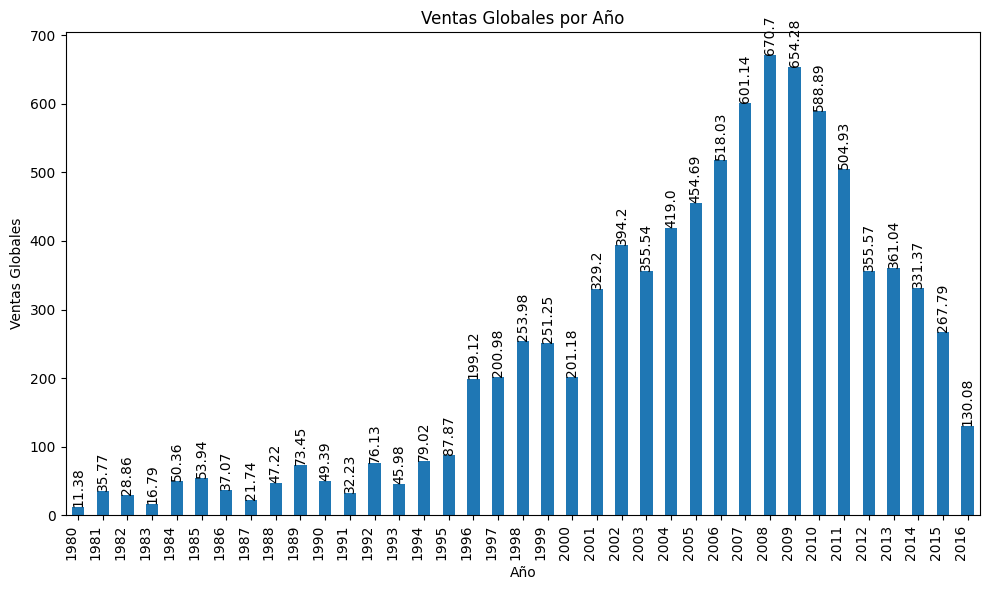

In [ ]:
 # Agrupar las ventas globales por año
sales_by_year4 = df2.groupby('Year_of_Release')['Global_Sales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sales_by_year4.plot(kind='bar')

# Configurar los ejes
plt.title('Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')

# Mostrar solo el año en el eje x
plt.xticks(range(len(sales_by_year4.index)), [str(int(year)) for year in sales_by_year4.index], rotation=90, ha='right')

# Mostrar el valor de cada barra de forma vertical
for i, sales in enumerate(sales_by_year4):
    plt.annotate(str(round(sales, 2)), xy=(i, sales), ha='center', va='bottom', rotation='vertical')

plt.tight_layout()
plt.show()

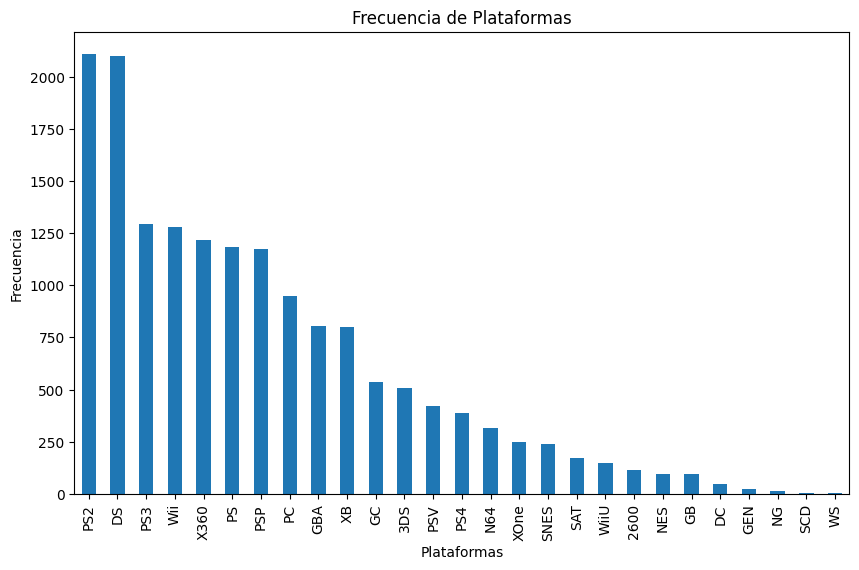

In [ ]:
# Crear el gráfico de barras para la columna "Platform"
plt.figure(figsize=(10, 6))
df2['Platform'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Plataformas')
plt.xlabel('Plataformas')
plt.ylabel('Frecuencia')
plt.show()


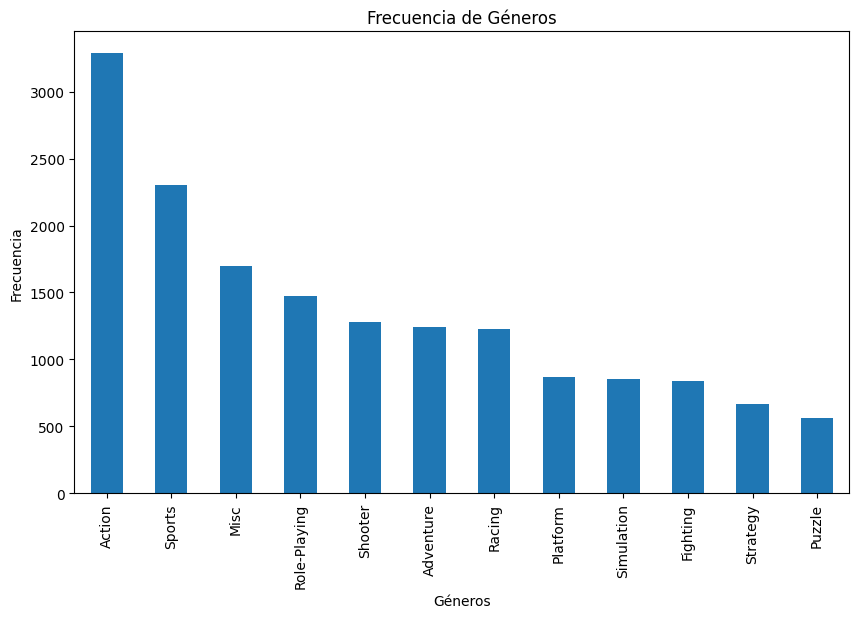

In [ ]:
# Crear el gráfico de barras para la columna "Genre"
plt.figure(figsize=(10, 6))
df2['Genre'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Géneros')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.show()

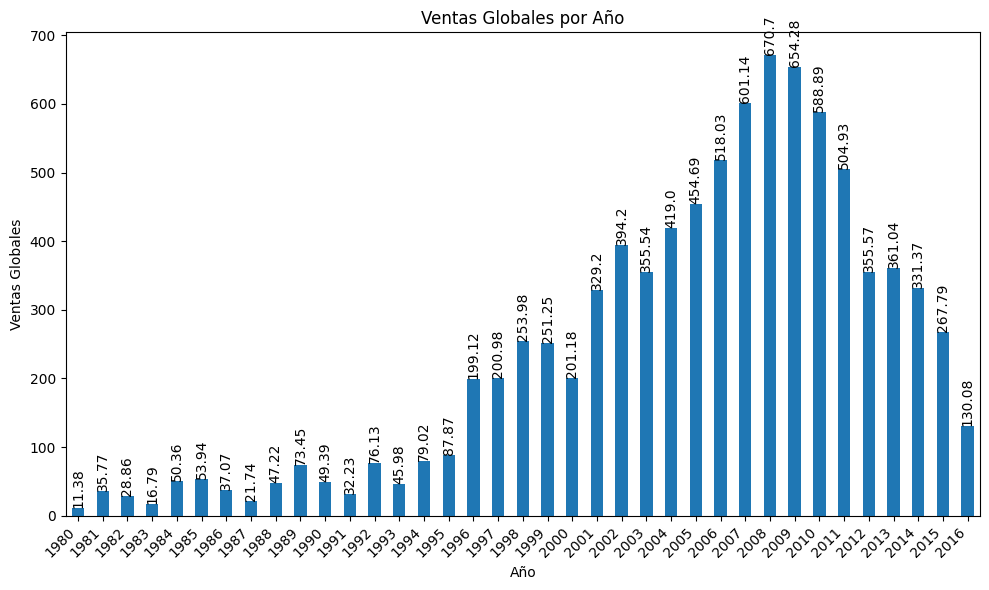

In [ ]:
 # Agrupar las ventas globales por año
sales_by_year2 = df2.groupby('Year_of_Release')['Global_Sales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sales_by_year2.plot(kind='bar')

# Configurar los ejes
plt.title('Ventas Globales por Año')
plt.xlabel('Año')
plt.ylabel('Ventas Globales')

# Mostrar solo el año en el eje x
plt.xticks(range(len(sales_by_year2.index)), [str(int(year)) for year in sales_by_year2.index], rotation=45, ha='right')

# Mostrar el valor de cada barra de forma vertical
for i, sales in enumerate(sales_by_year2):
    plt.annotate(str(round(sales, 2)), xy=(i, sales), ha='center', va='bottom', rotation='vertical')

plt.tight_layout()
plt.show()


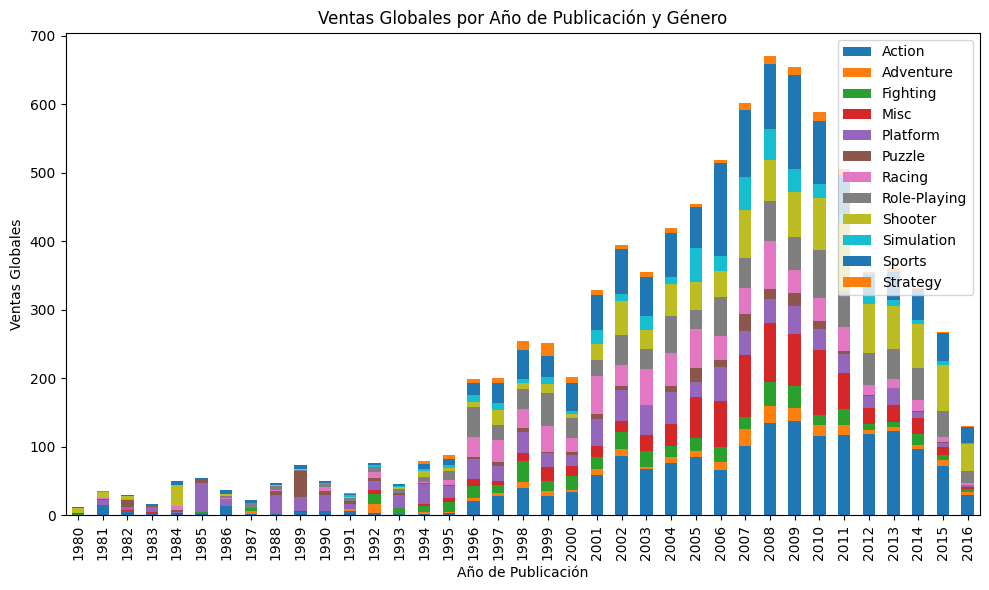

In [ ]:
# Agrupar las ventas globales por año de publicación y género
sales_by_year_genre = df2.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack()

# Crear el gráfico de barras agrupado
sales_by_year_genre.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurar los ejes y el título
plt.title('Ventas Globales por Año de Publicación y Género')
plt.xlabel('Año de Publicación')
plt.ylabel('Ventas Globales')

# Mostrar la leyenda
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


##Validación de hallazgos:
1. Realizar pruebas de hipótesis para validar las relaciones encontradas.
2. Evaluar la significancia estadística de los resultados.


In [ ]:
# Agrupar las ventas globales por año
ventas_por_anio_desc = df2.groupby('Year_of_Release')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
print(ventas_por_anio_desc.to_string(index=False))


 Year_of_Release  Global_Sales
            2008        670.70
            2009        654.28
            2007        601.14
            2010        588.89
            2006        518.03
            2011        504.93
            2005        454.69
            2004        419.00
            2002        394.20
            2013        361.04
            2012        355.57
            2003        355.54
            2014        331.37
            2001        329.20
            2015        267.79
            1998        253.98
            1999        251.25
            2000        201.18
            1997        200.98
            1996        199.12
            2016        130.08
            1995         87.87
            1994         79.02
            1992         76.13
            1989         73.45
            1985         53.94
            1984         50.36
            1990         49.39
            1988         47.22
            1993         45.98
            1986         37.07
        

In [ ]:
# Agrupar las ventas globales por genero
ventas_por_genero_desc = df2.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
print(ventas_por_genero_desc.to_string(index=False))

       Genre  Global_Sales
      Action       1712.42
      Sports       1310.02
     Shooter       1036.56
Role-Playing        929.77
    Platform        823.92
        Misc        787.16
      Racing        723.70
    Fighting        442.62
  Simulation        386.14
      Puzzle        238.37
   Adventure        227.73
    Strategy        171.75


In [ ]:
# Agrupar las ventas globales por genero
ventas_por_plataforma_desc = df2.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values(by='Global_Sales', ascending=False)
print(ventas_por_plataforma_desc.to_string(index=False))

Platform  Global_Sales
     PS2       1229.00
    X360        958.27
     PS3        928.82
     Wii        889.81
      DS        801.25
      PS        726.40
     PS4        314.13
     GBA        309.68
     PSP        287.32
     3DS        257.84
      PC        255.56
      GB        254.42
      XB        251.60
     NES        251.07
     N64        216.38
    SNES        200.05
      GC        195.37
    XOne        159.44
    2600         86.57
    WiiU         82.16
     PSV         53.43
     SAT         33.06
     GEN         28.22
      DC         15.58
     SCD          1.87
      NG          1.44
      WS          1.42


In [ ]:
# Agrupar las ventas globales por género y año
ventas_por_genero_y_anio = df2.groupby(['Genre', 'Year_of_Release'])['Global_Sales'].sum().reset_index()

# Agrupar las ventas globales por plataforma y año
ventas_por_plataforma_y_anio = df2.groupby(['Platform', 'Year_of_Release'])['Global_Sales'].sum().reset_index()

# Agrupar las ventas globales por año
ventas_por_anio_desc = df2.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Pivotear las tablas para obtener los datos en el formato deseado
tabla_genero = ventas_por_genero_y_anio.pivot_table(values='Global_Sales', index='Year_of_Release', columns='Genre', fill_value=0)
tabla_plataforma = ventas_por_plataforma_y_anio.pivot_table(values='Global_Sales', index='Year_of_Release', columns='Platform', fill_value=0)

# Agregar la columna de ventas globales totales por año
tabla_combinada = pd.merge(tabla_genero, tabla_plataforma, left_index=True, right_index=True)
tabla_combinada['Global_Sales'] = ventas_por_anio_desc.set_index('Year_of_Release')['Global_Sales']

# Mostrar la tabla combinada
tabla_combinada



Action  Adventure  Fighting   Misc  Platform  Puzzle  Racing  \
Year_of_Release                                                                 
1980               0.34       0.00      0.77   2.71      0.00    0.00    0.00   
1981              14.84       0.00      0.00   0.00      6.93    2.24    0.48   
1982               6.52       0.00      0.00   0.87      5.03   10.03    1.57   
1983               2.86       0.40      0.00   2.14      6.93    0.78    0.00   
1984               1.85       0.00      0.00   1.45      0.69    3.14    5.95   
1985               3.52       0.00      1.05   0.00     43.17    3.21    0.00   
1986              13.74       0.00      0.00   0.00      9.39    0.00    1.96   
1987               1.12       4.38      5.42   0.00      1.74    0.00    0.00   
1988               1.75       0.00      0.00   0.00     27.73    5.58    2.14   
1989               4.64       0.00      0.00   1.28     20.66   37.75    0.00   
1990               6.39       0.00      0.00   0.00     22.97    6.00    6.26   
1991               6.76       2.24      0.39   0.08      7.64    3.24    1.14   
1992               3.83      12.24     15.25   4.94     13.38    4.84    9.04   
1993               1.81       0.07      8.75   0.30     18.67    3.17    0.36   
1994               1.55       3.74      8.48   2.86     28.74    1.51    2.19   
1995               3.57       0.52     14.85   6.40     16.69    2.71    6.09   
1996              20.58       4.19     18.06  10.68     28.23    3.91   28.24   
1997              27.58       4.96     11.76   5.69     21.85    5.89   31.91   
1998              39.44       8.41     31.66  11.94     29.88    6.34   27.90   
1999              27.77       7.60     14.26  20.65     20.82    1.36   37.27   
2000              33.74       2.88     20.22  15.54     16.06    3.82   19.99   
2001              59.35       7.45     18.12  16.40     38.72    8.00   55.81   
2002              86.76      10.12     25.02  15.66     45.60    5.34   30.20   
2003              67.76       2.14     23.73  23.82     42.89    0.48   52.19   
2004              76.25       8.69     16.78  31.32     47.22    8.40   47.83   
2005              84.72       8.44     19.71  59.36     22.59   20.42   56.03   
2006              66.10      11.33     22.42  67.07     49.35   10.80   33.86   
2007             101.64      23.87     17.49  91.46     35.10   23.74   38.87   
2008             134.69      24.61     35.04  85.79     35.14   15.29   70.03   
2009             137.64      19.50     31.88  75.33     40.58   19.80   33.65   
2010             115.49      15.90     14.72  95.13     30.88   10.74   34.36   
2011             116.76      15.29     22.37  53.26     27.64    4.95   34.83   
2012             119.04       5.59      9.20  22.21     18.37    1.72   13.68   
2013             122.57       5.87      7.04  25.28     24.59    0.95   12.33   
2014              97.20       5.58     15.82  23.35      8.78    1.49   16.64   
2015              72.02       7.91      7.92  11.56      6.06    0.72    8.07   
2016              30.23       3.81      4.44   2.63      3.21    0.01    2.83   

                 Role-Playing  Shooter  Simulation  ...    SAT   SCD   SNES  \
Year_of_Release                                     ...                       
1980                     0.00     7.07        0.00  ...   0.00  0.00   0.00   
1981                     0.00    10.04        0.45  ...   0.00  0.00   0.00   
1982                     0.00     3.79        0.00  ...   0.00  0.00   0.00   
1983                     0.00     0.48        0.00  ...   0.00  0.00   0.00   
1984                     0.00    31.10        0.00  ...   0.00  0.00   0.00   
1985                     0.00     1.00        0.03  ...   0.00  0.00   0.00   
1986                     2.52     3.89        0.00  ...   0.00  0.00   0.00   
1987                     4.65     0.71        0.00  ...   0.00  0.00   0.00   
1988                     5.88     0.51        0.03  ...   0.00  0.0

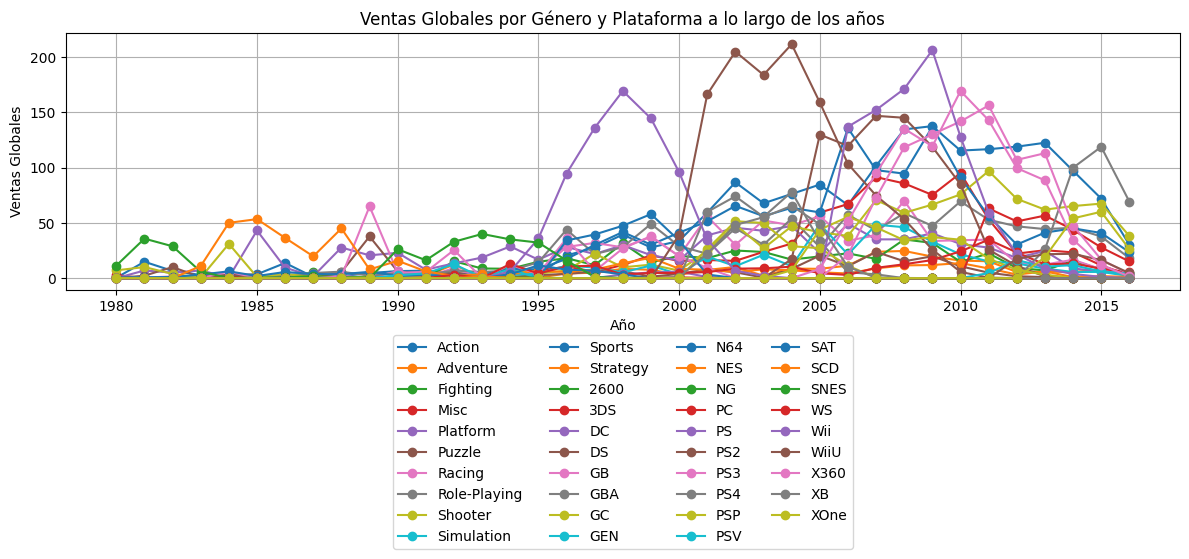

In [ ]:
import matplotlib.pyplot as plt

# Rellenar valores faltantes con ceros
tabla_combinada_filled = tabla_combinada.fillna(0)

# Eliminar la columna 'Global_Sales' ya que no es necesaria en la gráfica
tabla_combinada_plot = tabla_combinada_filled.drop(columns='Global_Sales')

# Crear la gráfica para cada género y plataforma
plt.figure(figsize=(12, 6))
for column in tabla_combinada_plot.columns:
    plt.plot(tabla_combinada_plot.index, tabla_combinada_plot[column], marker='o', linestyle='-')

plt.xlabel('Año')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales por Género y Plataforma a lo largo de los años')
plt.legend(tabla_combinada_plot.columns, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()


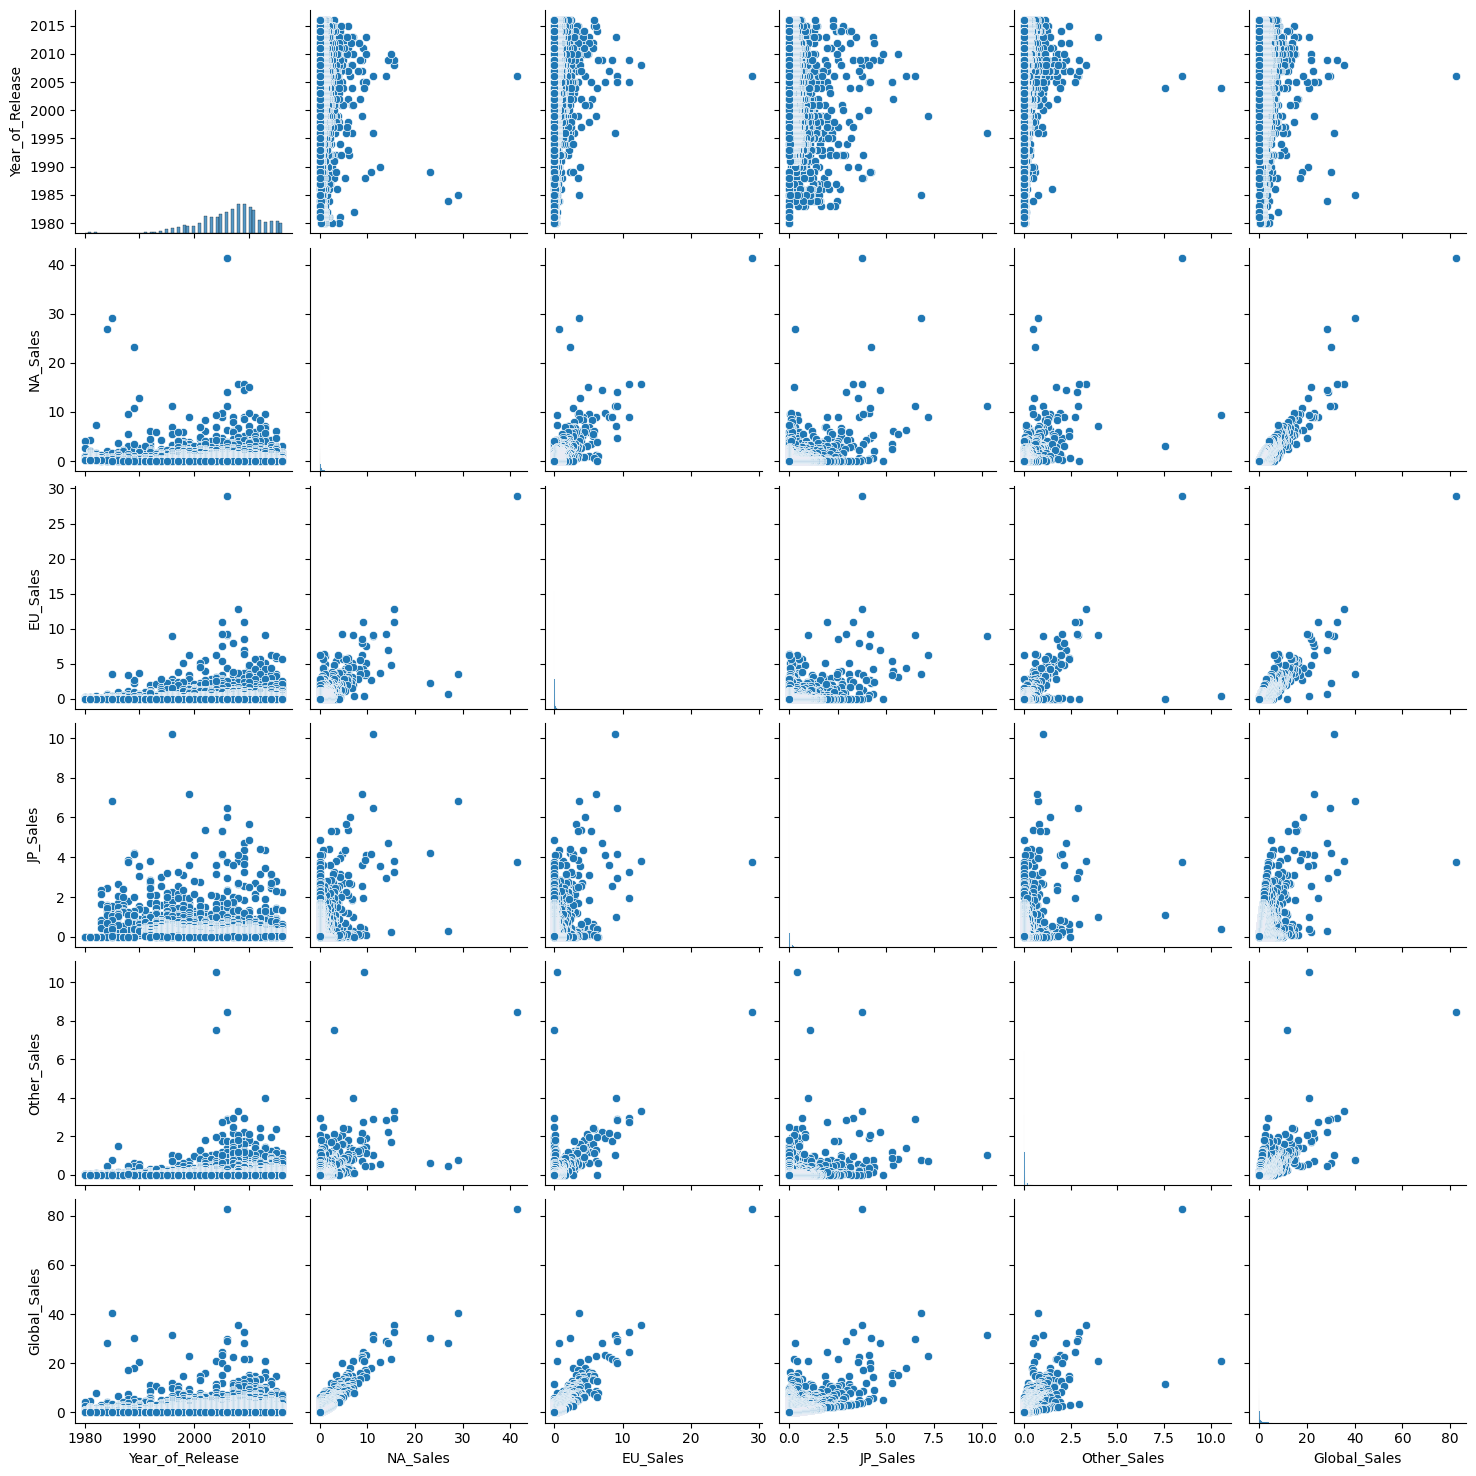

In [ ]:
# Crear la matriz de dispersión
sns.pairplot(df2)
plt.show()

In [ ]:
# Obtener las opciones únicas en la columna "Platform"
unique_platforms = df2['Platform'].unique()

# Obtener las opciones únicas en la columna "Genre"
unique_genres = df2['Genre'].unique()

# Imprimir las opciones únicas en cada columna
print("Opciones únicas en la columna 'Platform':")
print(unique_platforms)

print("\nOpciones únicas en la columna 'Genre':")
print(unique_genres)

Opciones únicas en la columna 'Platform':
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' 2600 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT' 'SCD'
 'WS' 'NG']

Opciones únicas en la columna 'Genre':
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


<Figure size 768x576 with 0 Axes>

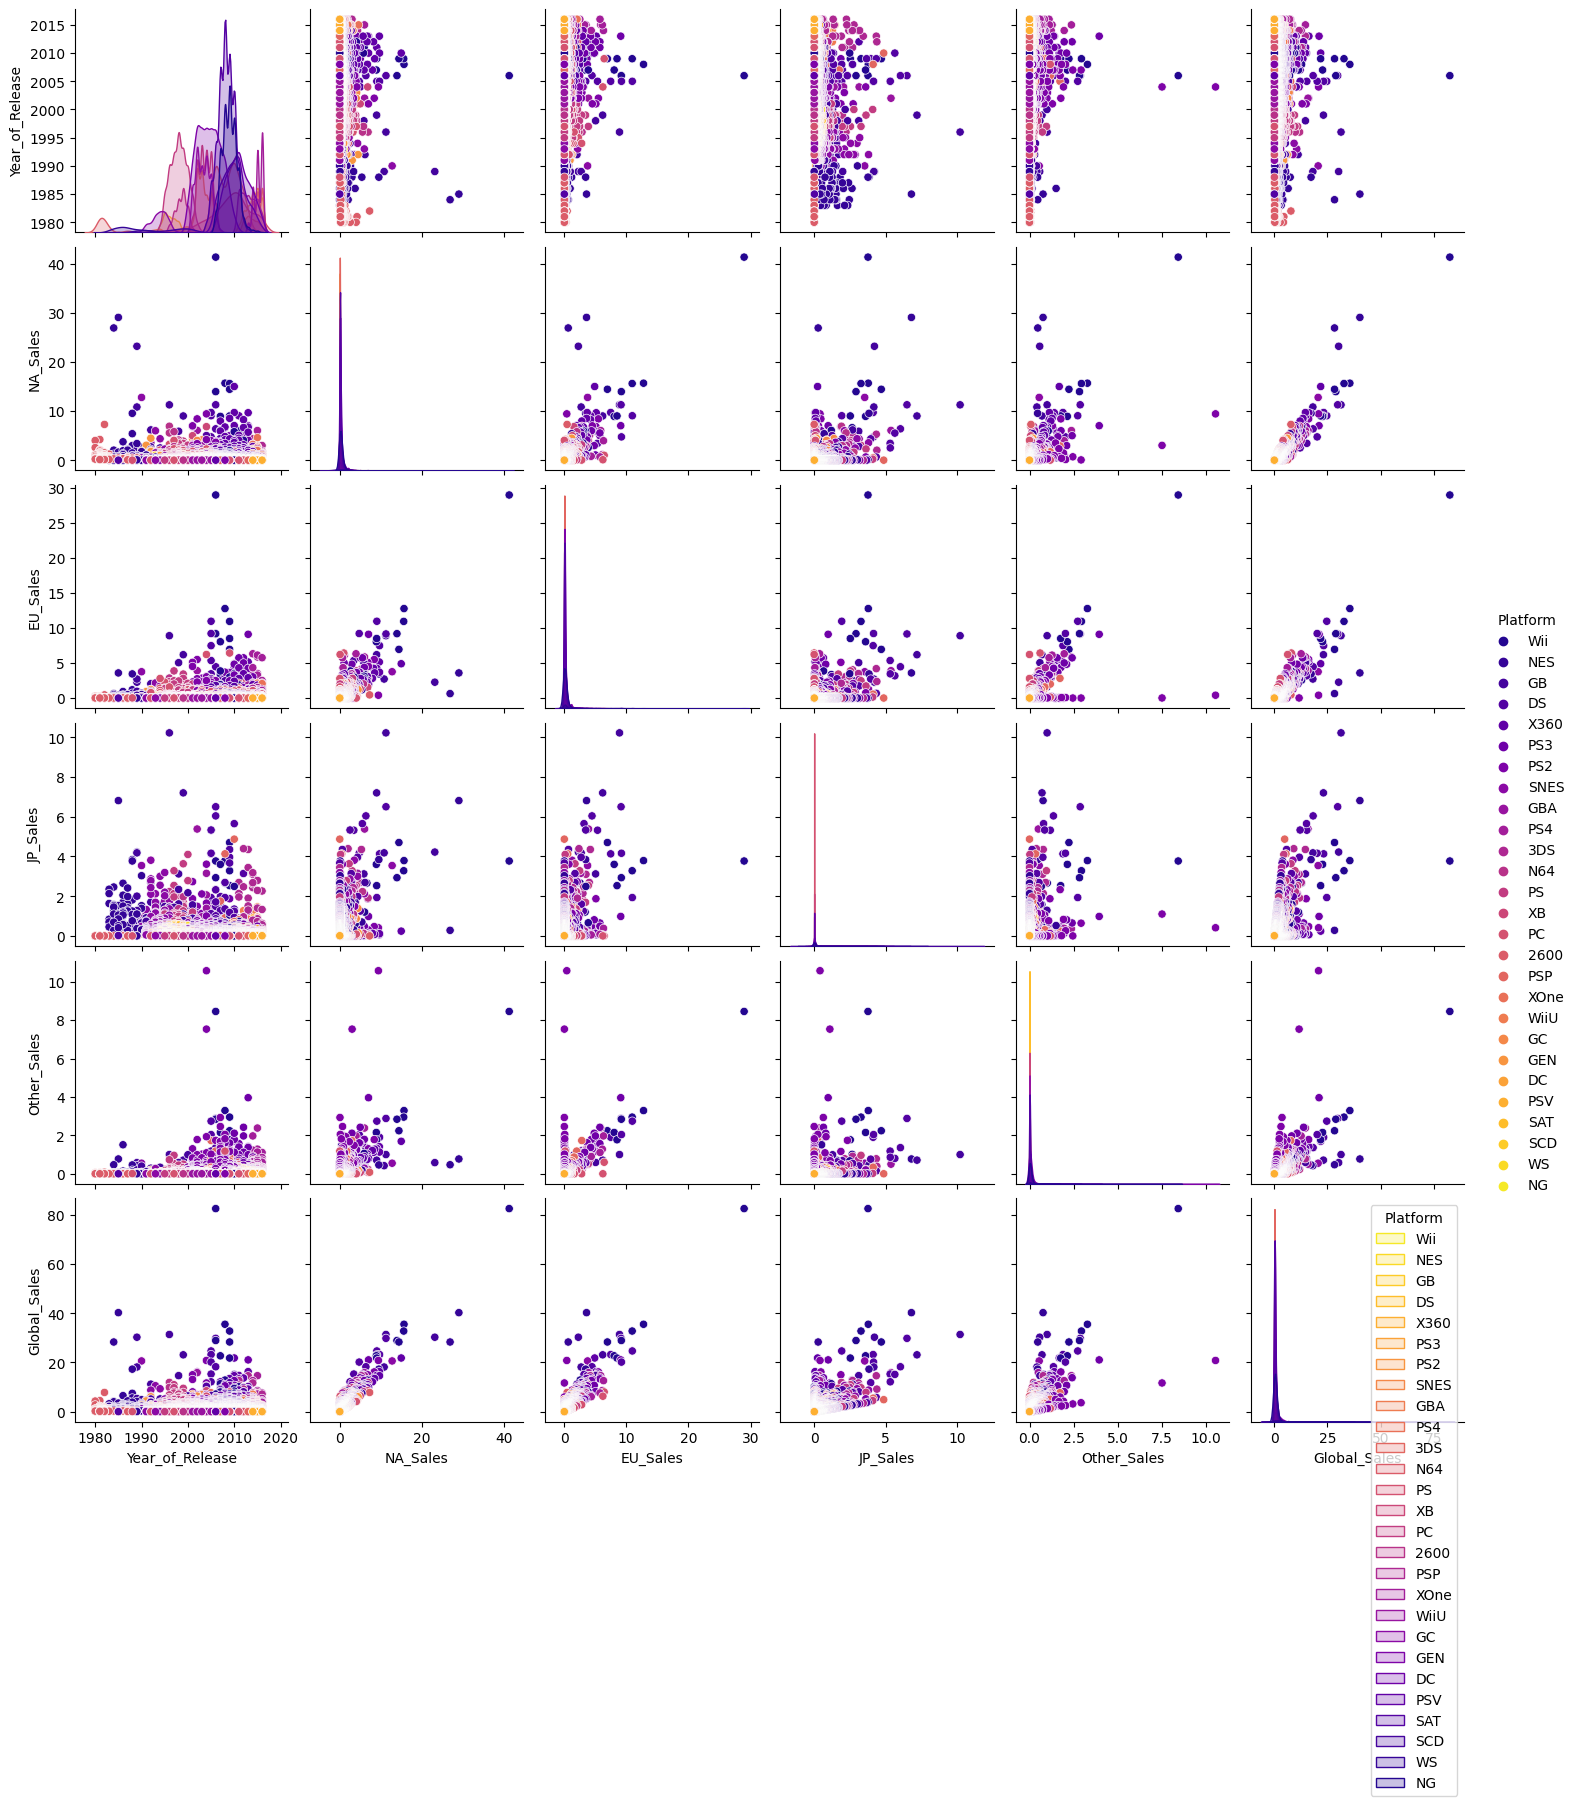

In [ ]:
# Crear el Pairplot con el atributo hue='Platform'
plt.figure(dpi=120)
sns.pairplot(df2, hue='Platform', palette='plasma')
plt.legend(title='Platform', labels=df2['Platform'].unique(), bbox_to_anchor=(1, 1))
plt.show()

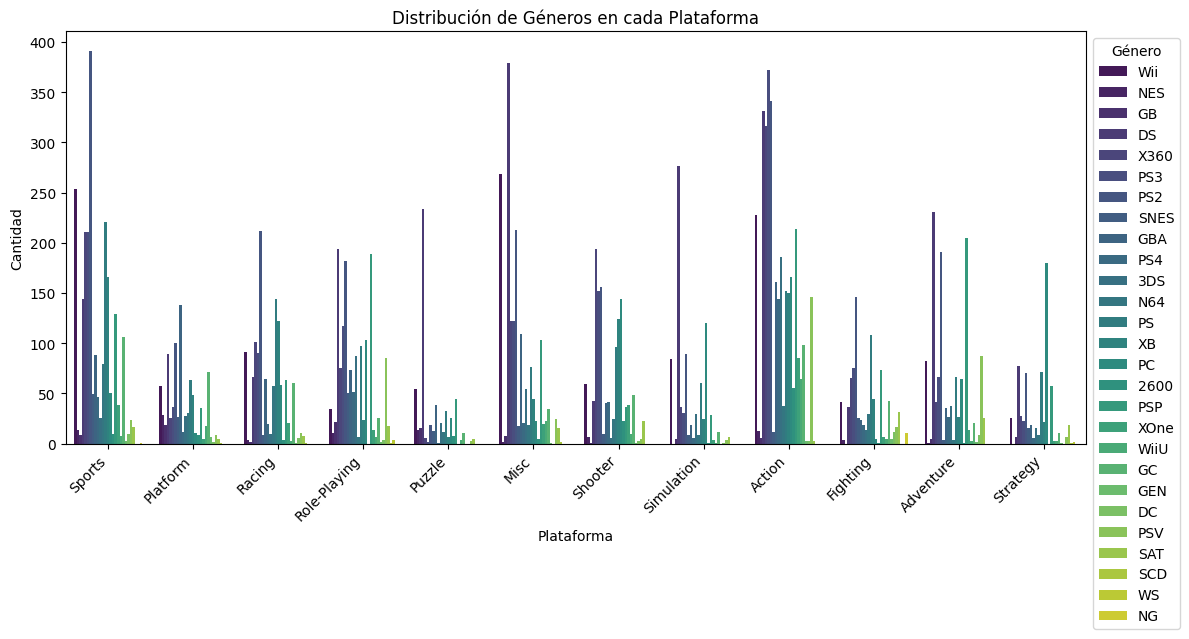

In [ ]:
# Crear un gráfico de barras apiladas para mostrar la distribución de géneros en cada plataforma
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='Genre', hue='Platform', palette='viridis')
plt.title('Distribución de Géneros en cada Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<ipython-input-119-de04b38d128b>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df2, x='Platform', y='Genre', palette='viridis', jitter=True)


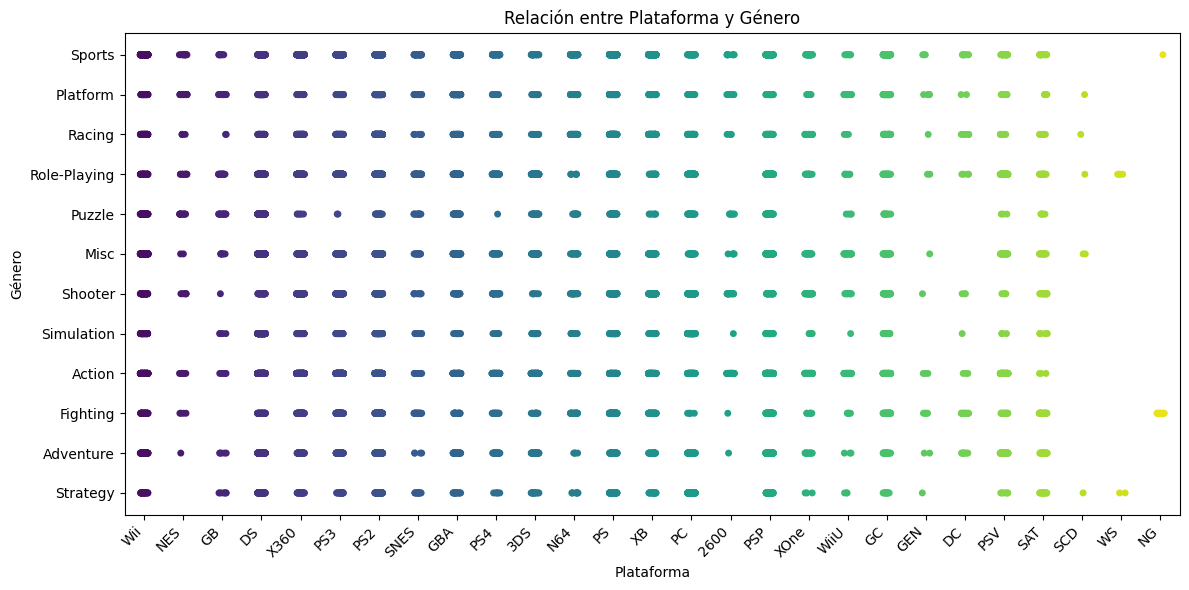

In [ ]:
# Crear un gráfico de dispersión categórico para mostrar la relación entre "Platform" y "Genre"
plt.figure(figsize=(12, 6))
sns.stripplot(data=df2, x='Platform', y='Genre', palette='viridis', jitter=True)
plt.title('Relación entre Plataforma y Género')
plt.xlabel('Plataforma')
plt.ylabel('Género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

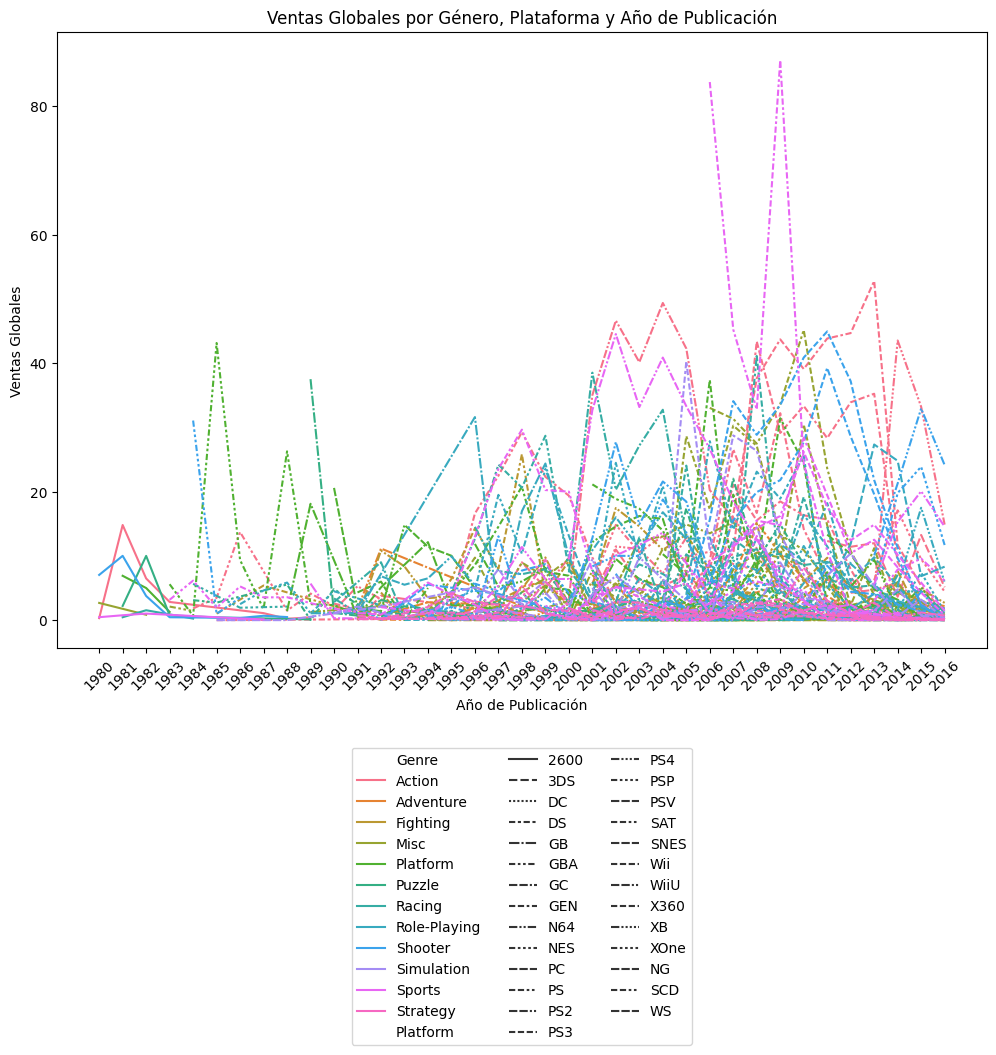

In [ ]:
# Agrupar las ventas globales por género, plataforma y año
ventas_por_genero_plataforma_y_anio = df2.groupby(['Genre', 'Platform', 'Year_of_Release'])['Global_Sales'].sum().reset_index()

# Crear el gráfico usando seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=ventas_por_genero_plataforma_y_anio, x='Year_of_Release', y='Global_Sales', hue='Genre', style='Platform')

# Configurar los ejes y el título
plt.title('Ventas Globales por Género, Plataforma y Año de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Ventas Globales')

# Configurar los valores del eje x para que se muestren de 1 en 1
plt.xticks(ventas_por_genero_plataforma_y_anio['Year_of_Release'].unique(), rotation=45)

# Mover la leyenda a la parte inferior y centrarla
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Guardar el gráfico en un archivo PNG
plt.savefig('grafico_ventas_globales.png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


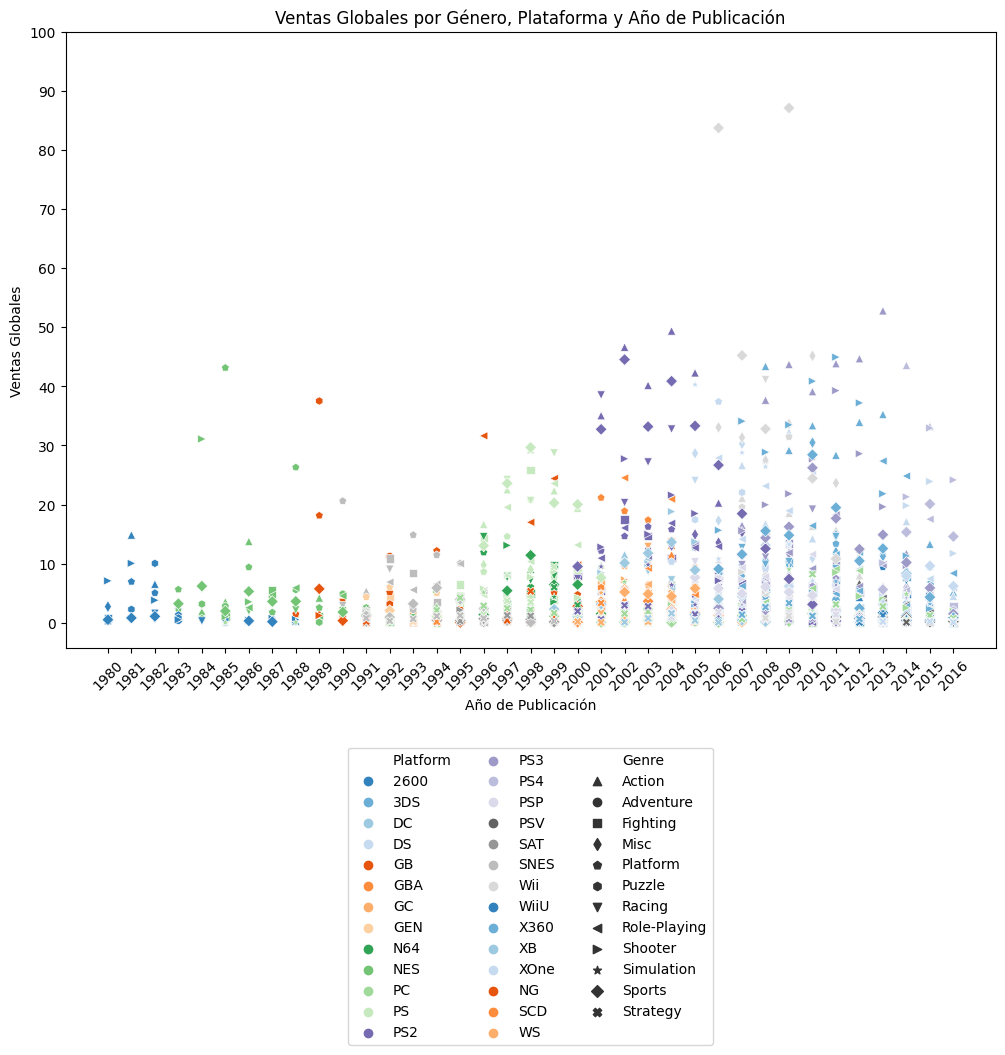

In [ ]:
# Agrupar las ventas globales por género, plataforma y año
ventas_por_genero_plataforma_y_anio = df2.groupby(['Genre', 'Platform', 'Year_of_Release'])['Global_Sales'].sum().reset_index()

# Crear el gráfico usando seaborn con un scatter plot
plt.figure(figsize=(12, 8))

sns.scatterplot(data=ventas_por_genero_plataforma_y_anio, x='Year_of_Release', y='Global_Sales', hue='Platform', style='Genre', markers=['^', 'o', 's', 'd', 'p', 'h', 'v', '<', '>','*', 'D', "X"], sizes=(50, 200), palette='tab20c')

plt.yticks(range(0, 101, 10))

# Configurar los ejes y el título
plt.title('Ventas Globales por Género, Plataforma y Año de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Ventas Globales')

# Configurar los valores del eje x para que se muestren de 1 en 1
plt.xticks(ventas_por_genero_plataforma_y_anio['Year_of_Release'].unique(), rotation=45)

# Mover la leyenda a la parte inferior y centrarla
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Guardar el gráfico en un archivo PNG
plt.savefig('grafico_ventas_globales_gen_plat_anio.png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


##Generación de insights y storytelling:
1. Interpretar los resultados obtenidos y generar insights significativos.
2. Comunicar los hallazgos de manera clara y efectiva, utilizando técnicas de storytelling de datos.


1- Los videojuegos de género "Shooter" tienen altas ventas en plataformas como Xbox 360, PlayStation 3 y PlayStation 4, lo que sugiere que este género es popular entre los usuarios de estas consolas.

2- Los videojuegos de género "Role-Playing" tienen altas ventas en plataformas como Nintendo DS, PlayStation 2 y PlayStation 3, indicando que este género es preferido por los jugadores que utilizan estas plataformas.

3- Las ventas globales de videojuegos para ciertas plataformas, como PlayStation 2, Xbox 360 y PlayStation 3, son más altas en general, lo que sugiere que estas consolas han sido populares en el mercado.

4- La combinación de género y plataforma puede afectar significativamente las ventas globales de un videojuego, lo que resalta la importancia de elegir estratégicamente el género y la plataforma adecuados para maximizar el éxito comercial.

5- Las ventas globales de videojuegos han variado a lo largo del tiempo, mostrando patrones de popularidad en diferentes años y décadas.

6- Las preferencias de género y las plataformas más populares han cambiado con el tiempo, lo que resalta la importancia de comprender las tendencias del mercado para adaptar las estrategias de desarrollo y marketing.

7- Las ventas de videojuegos de género "Action" y "Sports" son particularmente altas en comparación con otros géneros, lo que sugiere que estos géneros tienen un amplio atractivo entre los jugadores.

8- Las ventas globales de videojuegos han aumentado significativamente a lo largo de los años, indicando un crecimiento general en la industria de los videojuegos.

9- Algunas plataformas, como PlayStation 2 y Nintendo DS, han tenido un éxito duradero en términos de ventas globales a lo largo de varios años.

10- Existe una correlación entre el éxito de ventas globales de un videojuego y su género y plataforma específicos, lo que indica que conocer bien a la audiencia objetivo es crucial para el desarrollo de videojuegos exitosos.

#Paso 6 Data Wrangling

###La Ingeniería de Características (Feature Engineering)

##Extrajimos datos de interés


En esta etapa, se identifican y se extraen los datos relevantes de las fuentes disponibles. Puede implicar la recolección de datos de diversas fuentes, como bases de datos, archivos CSV o API, para obtener la información necesaria para el análisis.

La API de RAWG es una herramienta que proporciona información detallada sobre juegos. Es útil para desarrolladores de aplicaciones o sitios web relacionados con videojuegos. Puedes acceder a datos como detalles del juego, calificaciones, géneros y plataformas compatibles. Esto te permite construir catálogos de juegos, sistemas de búsqueda y recomendación, entre otros. La API requiere una clave de API y su URL base es 'https://api.rawg.io/api/'.

Tener en cuenta: utilizo la version free del API, asi que como maximo puedo extraer 20000 filas de la db. Por otro lado, al momento de extraer la data con el servicio que ofrece google colab, me aparece un error, ya que la ultima actualizacion no permite cambiar la velocidad de consulta: "IOPub data rate exceeded. The notebook server will temporarily stop sending output to the client in order to avoid crashing it. To change this limit, set the config variable --NotebookApp.iopub_data_rate_limit.

Current values: NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec) NotebookApp.rate_limit_window=3.0 (secs) " En conclusion: Para evitar el error mencionado, se aloja los datos extraidos en un archivo excel y despues realizmos la extraemos en formato dataframe

*#Codigo de la extraccion de la data del api

import requests
import pandas as pd
from openpyxl import Workbook
from google.colab import drive

*## Montar Google Drive
drive.mount('/content/gdrive')

api_key = 'd5bf892e729a43ce806fab5d80324283'
url = "https://api.rawg.io/api/games"

params = {
    "key": api_key,
    "page_size": 40,  ## Cantidad de juegos por página
    "page": 1  ## Página inicial
}

*## Realizar solicitud GET a la API
games = []  ## Lista para almacenar los datos de los juegos
pages = 0  ## Contador de páginas

while pages < 500:  ## Limitamos la extracción a 500 páginas
    df = requests.get(url, params=params)  ## Realizar solicitud GET a la API
    data = df.json().get("results", [])  ## Obtener los resultados de la respuesta en formato JSON

    for game in data:
        puntuaciones = game.get("ratings", [])  ## Obtener las puntuaciones del juego
        game_data = {
            "Nombre": game.get("name", "N/A"),  ## Obtener el nombre del juego, si no está presente, se asigna "N/A"
            "Rating": game.get("rating", "N/A"),  ## Obtener la calificación del juego, si no está presente, se asigna "N/A"
            "Fecha de lanzamiento": game.get("released", "N/A")  ## Obtener la fecha de lanzamiento del juego, si no está presente, se asigna "N/A"
        }

        for puntuacion in puntuaciones:
            titulo = puntuacion.get("title", "N/A")  ## Obtener el título de la puntuación, si no está presente, se asigna "N/A"
            percent = puntuacion.get("percent", "N/A")  ## Obtener el porcentaje de la puntuación, si no está presente, se asigna "N/A"
            game_data[f"Puntuacion({titulo})"] = percent  ## Agregar la puntuación al diccionario del juego
        games.append(game_data)  ## Agregar los datos del juego a la lista de juegos

    ## Verificar si hay más páginas de resultados
    if df.json().get("next"):
        params["page"] += 1  ## Incrementar el número de página en los parámetros de solicitud
        pages += 1  ## Incrementar el contador de páginas
    else:
        break

*## Crear DataFrame a partir de la lista de juegos
df = pd.DataFrame(games)

*## Extraer solo el año de la fecha de lanzamiento si existe la columna
if "Fecha de lanzamiento" in df.columns:
    df["Fecha de lanzamiento"] = df["Fecha de lanzamiento"].str.split("-").str[0]

*## Guardar el DataFrame como un archivo Excel
excel_path = '/content/gdrive/MyDrive/datos/API_RAWG_20000_Filas.xlsx'  ## Ruta de archivo de Excel para guardar los datos
df.to_excel(excel_path, index=False)  ## Guardar el DataFrame en formato Excel

*## Imprimir el mensaje de éxito
print(f"El DataFrame se ha guardado en '{excel_path}'")

*## Desmontar Google Drive
drive.flush_and_unmount()

*# Obtener los tipos de datos de las columnas
tipos_de_datos = df.dtypes
print(tipos_de_datos)

*# Obtener el tamaño del DataFrame
tamaño = df.shape
print(tamaño)

In [ ]:
df1

Nombre  Rating  Fecha de lanzamiento  \
0                    Grand Theft Auto V    4.47                2013.0   
1              The Witcher 3: Wild Hunt    4.66                2015.0   
2                              Portal 2    4.61                2011.0   
3                    Tomb Raider (2013)    4.05                2013.0   
4      Counter-Strike: Global Offensive    3.57                2012.0   
...                                 ...     ...                   ...   
19995                           Dogstar    0.00                   NaN   
19996              Music Awards Manager    0.00                2017.0   
19997    Eiyu*Senki: The World Conquest    4.14                2013.0   
19998                        Cutie Paws    0.00                2017.0   
19999                         Ninja Way    0.00                2017.0   

       Puntuacion(exceptional)  Puntuacion(recommended)  Puntuacion(meh)  \
0                        58.95                    32.87             6.35   
1                        77.38                    16.02             4.10   
2                        70.38                    24.83             2.68   
3                        25.58                    60.23            11.09   
4                        16.05                    46.99            25.81   
...                        ...                      ...              ...   
19995                      NaN                      NaN              NaN   
19996                      NaN                      NaN           100.00   
19997                    42.86                    28.57            28.57   
19998                      NaN                      NaN              NaN   
19999                      NaN                      NaN              NaN   

       Puntuacion(skip)  
0                  1.83  
1                  2.50  
2                  2.12  
3                  3.10  
4                 11.16  
...                 ...  
19995            100.00  
19996               NaN  
19997               NaN  
19998               NaN  
19999               NaN  

[20000 rows x 7 columns]

##Comenzamos el proceso de limpieza y estructuración


 En esta etapa, se llevan a cabo las tareas de limpieza y estructuración de los datos adquiridos. Esto implica eliminar valores duplicados o inconsistentes, tratar los valores faltantes, normalizar o estandarizar variables, renombrar columnas, reorganizar el formato de los datos, entre otros. El objetivo es asegurar que los datos estén en un formato adecuado y coherente para el análisis posterior.

In [ ]:
# Listar las columnas de df1
print(df1.columns.tolist())

['Nombre', 'Rating', 'Fecha de lanzamiento', 'Puntuacion(exceptional)', 'Puntuacion(recommended)', 'Puntuacion(meh)', 'Puntuacion(skip)']


In [ ]:
#Unir dataframes en basea a el nombre del videojuego y su año de publicacion
df_combined = pd.merge(df2, df1, left_on=["Name", "Year_of_Release"], right_on=["Nombre", "Fecha de lanzamiento"], how="inner")

In [ ]:
# Comprobar el nombre exacto de la columna
print(df_combined.columns.tolist())

['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Nombre', 'Rating', 'Fecha de lanzamiento', 'Puntuacion(exceptional)', 'Puntuacion(recommended)', 'Puntuacion(meh)', 'Puntuacion(skip)']


In [ ]:
# Eliminar las columnas "Nombre" y "Fecha de lanzamiento"
df_combined = df_combined.drop(["Name","Nombre", "Fecha de lanzamiento"], axis=1)

In [ ]:
print(df_combined.shape)
print(df_combined.dtypes)

(3360, 13)
Platform                    object
Year_of_Release              int64
Genre                       object
NA_Sales                   float64
EU_Sales                   float64
JP_Sales                   float64
Other_Sales                float64
Global_Sales               float64
Rating                     float64
Puntuacion(exceptional)    float64
Puntuacion(recommended)    float64
Puntuacion(meh)            float64
Puntuacion(skip)           float64
dtype: object


In [ ]:
df_combined

Platform  Year_of_Release     Genre  NA_Sales  EU_Sales  JP_Sales  \
0         Wii             2006    Sports     41.36     28.96      3.77   
1         NES             1985  Platform     29.08      3.58      6.81   
2         Wii             2008    Racing     15.68     12.76      3.79   
3         Wii             2009    Sports     15.61     10.93      3.28   
4          DS             2006  Platform     11.28      9.14      6.50   
...       ...              ...       ...       ...       ...       ...   
3355       PC             2009    Action      0.00      0.01      0.00   
3356       PC             2007  Strategy      0.00      0.01      0.00   
3357       PC             2008    Sports      0.00      0.01      0.00   
3358       PC             1997  Strategy      0.00      0.01      0.00   
3359       PC             2011   Shooter      0.01      0.00      0.00   

      Other_Sales  Global_Sales  Rating  Puntuacion(exceptional)  \
0            8.45         82.53    4.18                    33.20   
1            0.77         40.24    4.30                    43.10   
2            3.29         35.52    4.29                    36.36   
3            2.95         32.77    4.20                    37.80   
4            2.88         29.80    4.14                    24.79   
...           ...           ...     ...                      ...   
3355         0.00          0.01    3.90                    14.29   
3356         0.00          0.01    3.00                      NaN   
3357         0.00          0.01    0.00                      NaN   
3358         0.00          0.01    4.22                    34.09   
3359         0.00          0.01    1.91                     2.22   

      Puntuacion(recommended)  Puntuacion(meh)  Puntuacion(skip)  
0                       55.74             9.02              2.05  
1                       47.98             6.83              2.09  
2                       58.04             4.90              0.70  
3                       51.18             7.87              3.15  
4                       67.77             5.79              1.65  
...                       ...              ...               ...  
3355                    67.01            15.99              2.72  
3356                    52.17            21.74             26.09  
3357                      NaN              NaN               NaN  
3358                    60.23             2.27              3.41  
3359                     6.67            31.11             60.00  

[3360 rows x 13 columns]

<Axes: >

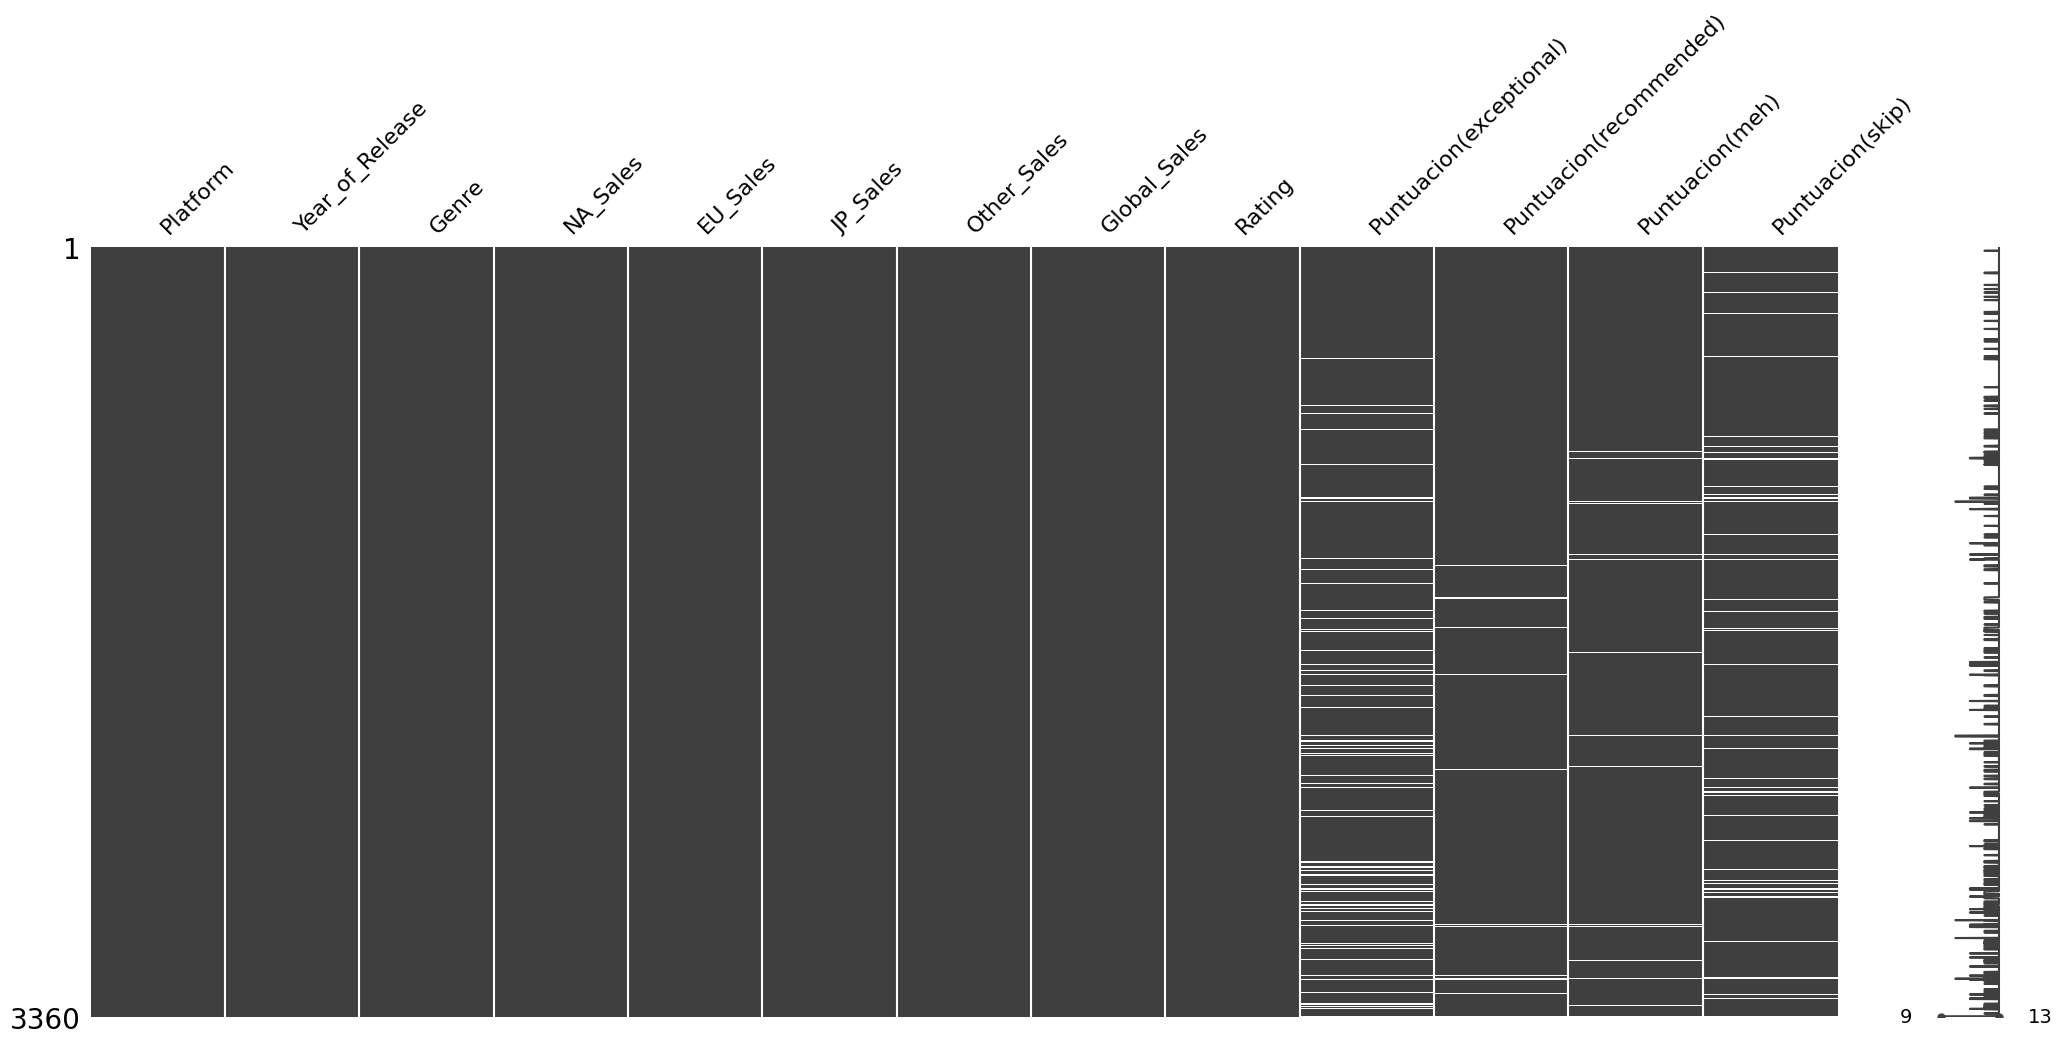

In [ ]:
msno.matrix(df_combined)

In [ ]:
# Definir las columnas con valores nulos
columns_with_nulls = ['Puntuacion(exceptional)','Puntuacion(skip)', 'Puntuacion(meh)', 'Puntuacion(recommended)']

In [ ]:
# Iterar sobre las columnas con valores nulos
for column in columns_with_nulls:
    # Calcular el promedio por grupo (Genre y Platform) y rellenar los valores faltantes
    df_combined[column] = df_combined.groupby(['Genre', 'Platform'])[column].transform(lambda x: x.fillna(x.mean()))

<Axes: >

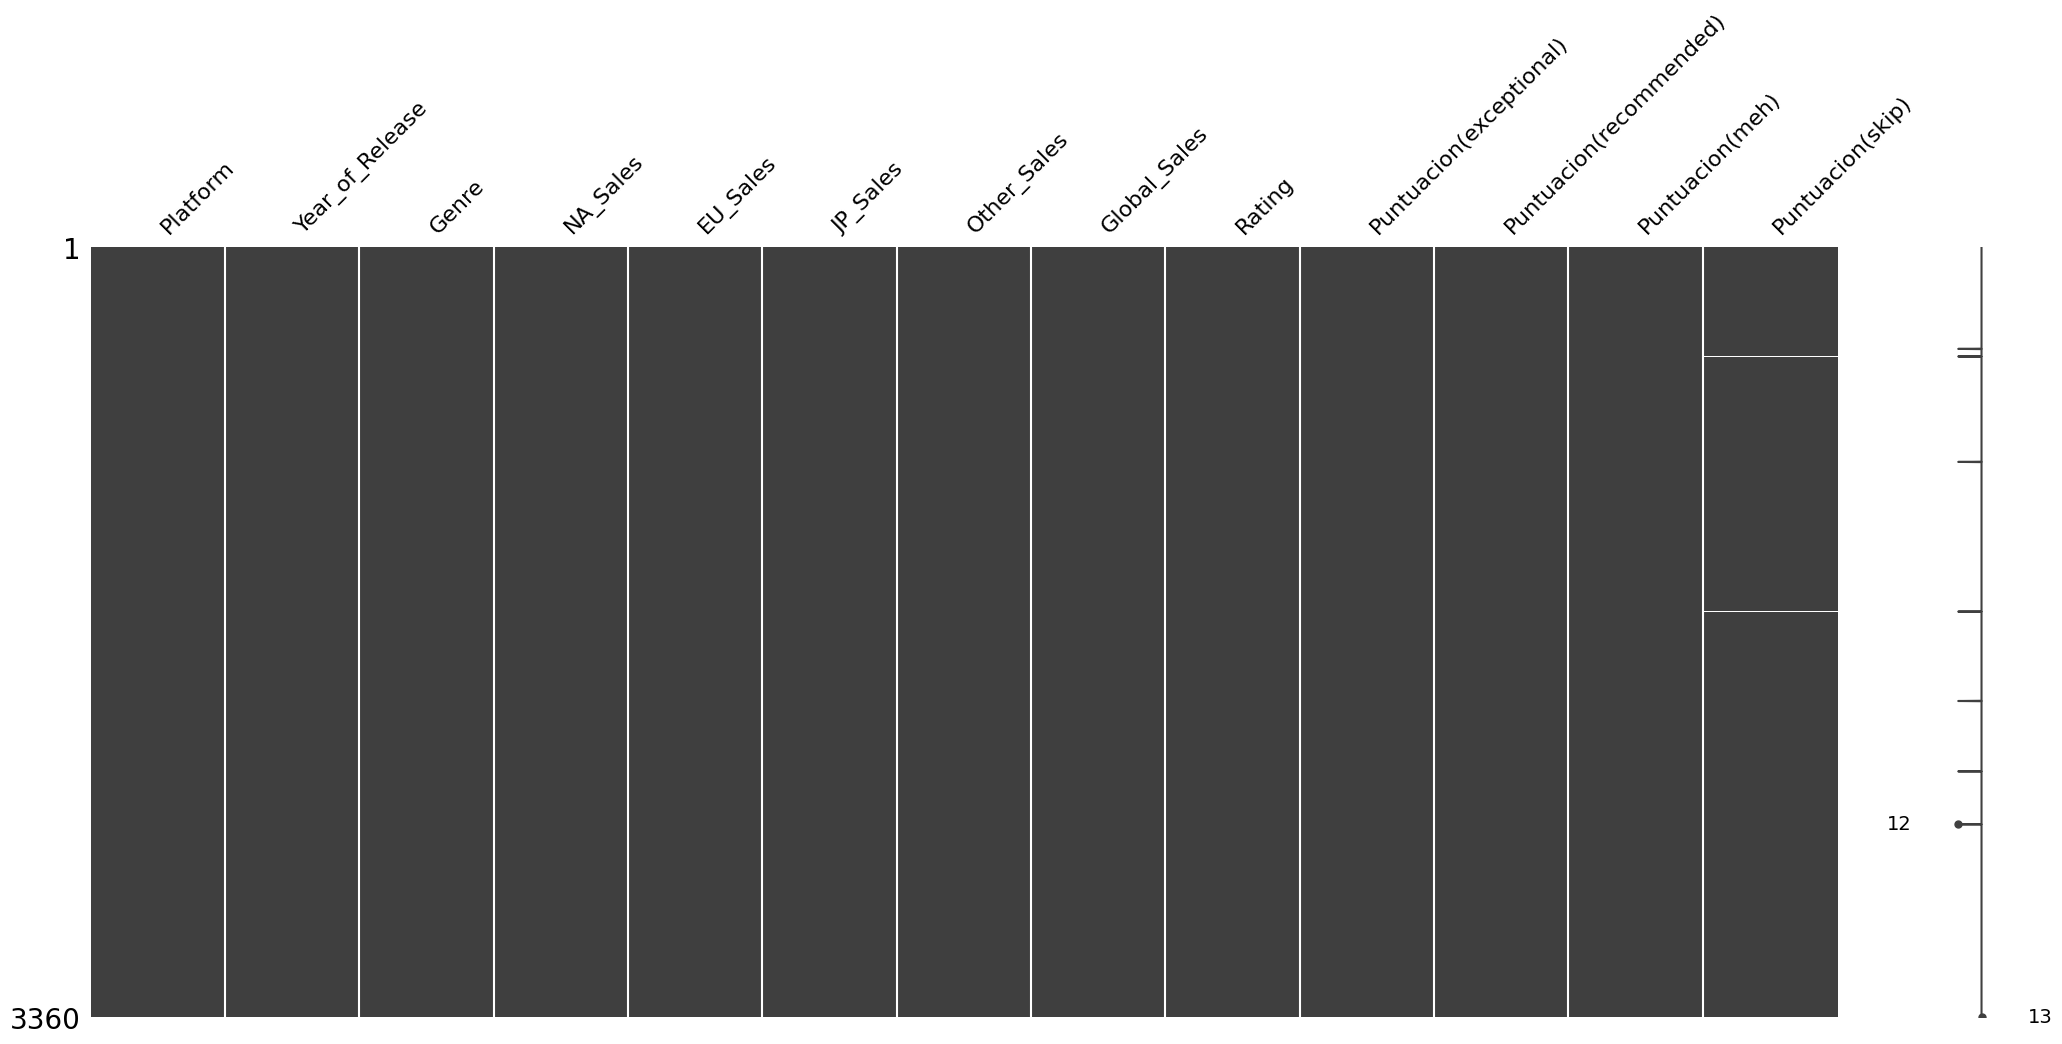

In [ ]:
msno.matrix(df_combined)

In [ ]:
# Eliminar las filas que contienen valores nulos
df_combined = df_combined.dropna()

<Axes: >

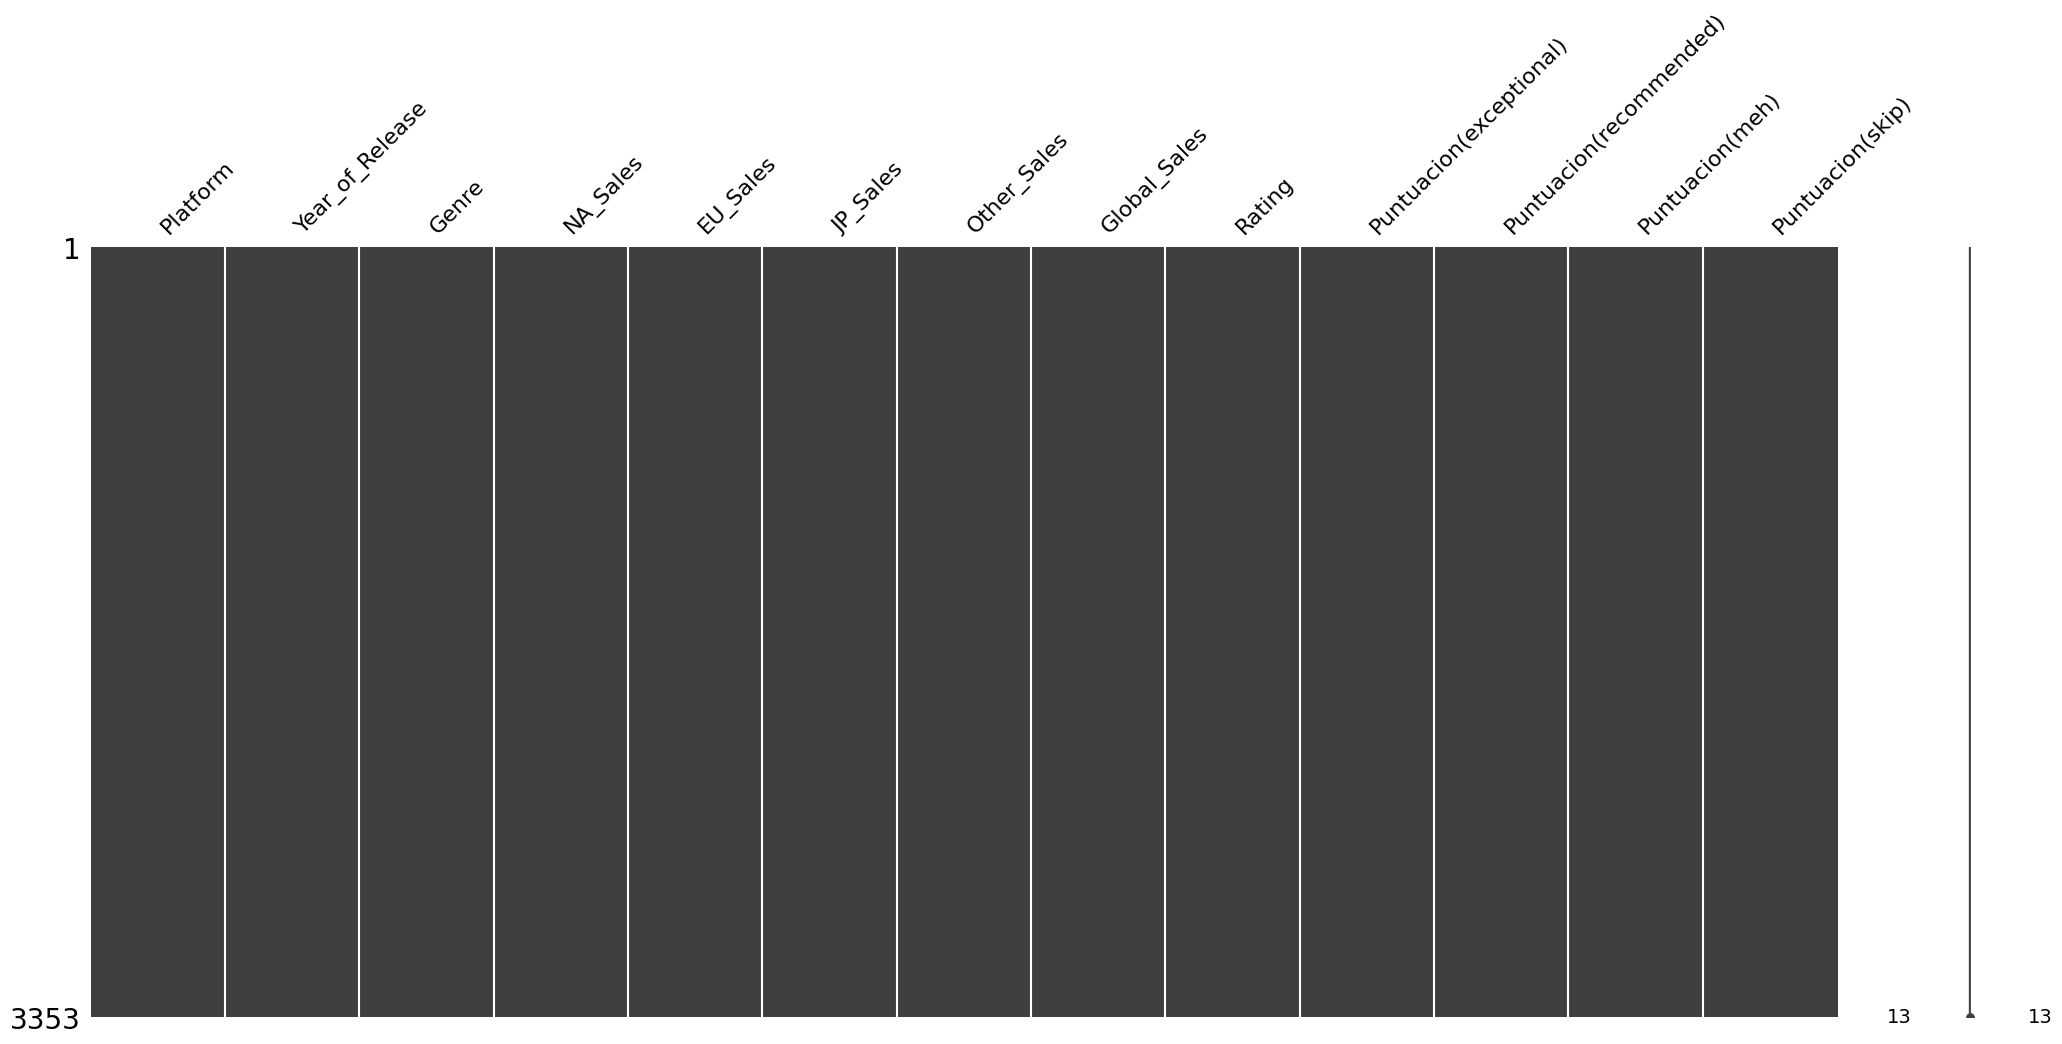

In [ ]:
msno.matrix(df_combined)

In [ ]:
# Seleccionar solo las columnas numéricas Finales
numeric_columnsFinal = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales','Rating','Puntuacion(exceptional)','Puntuacion(recommended)','Puntuacion(meh)','Puntuacion(skip)' ]
numeric_df = df_combined[numeric_columnsFinal]


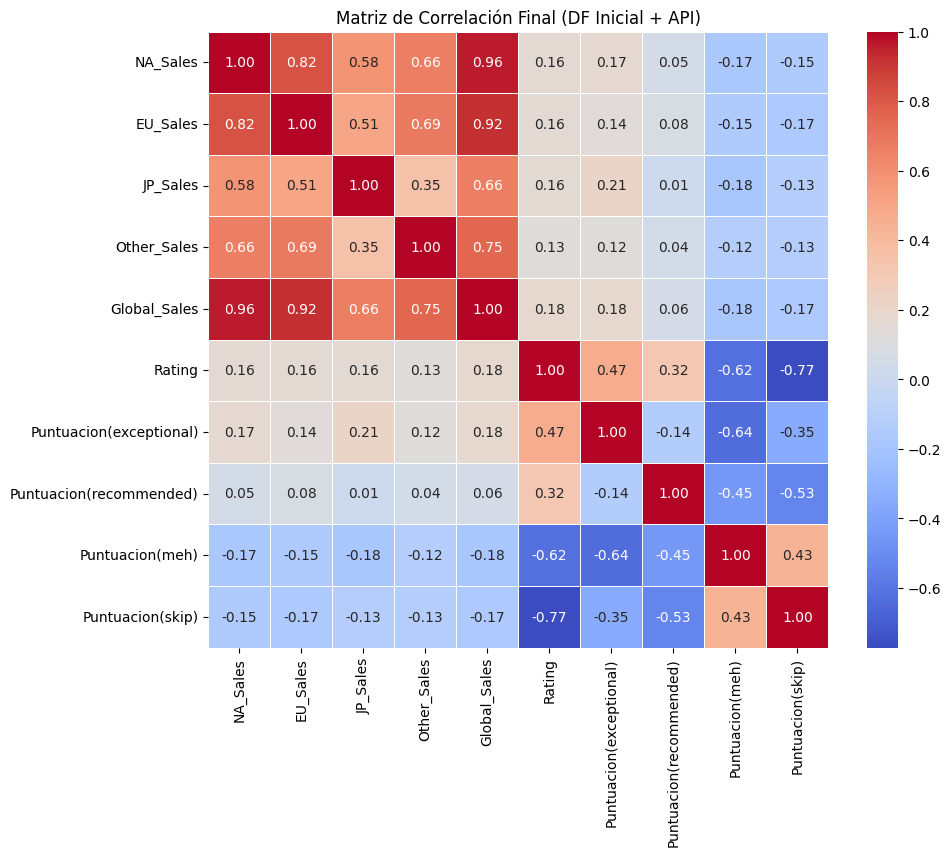

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Grafica la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Final (DF Inicial + API)')
plt.show()

##Desarrollamos algunas hipótesis




 En esta etapa, se formulan hipótesis basadas en la comprensión inicial de los datos y en el contexto del problema comercial. Estas hipótesis pueden ser suposiciones o predicciones iniciales sobre posibles relaciones entre variables o comportamientos de los datos. Las hipótesis pueden guiar el análisis exploratorio de los datos y orientar las pruebas y validaciones posteriores.

In [ ]:
print(ventas_por_anio_desc.to_string(index=False))


 Year_of_Release  Global_Sales
            1980         11.38
            1981         35.77
            1982         28.86
            1983         16.79
            1984         50.36
            1985         53.94
            1986         37.07
            1987         21.74
            1988         47.22
            1989         73.45
            1990         49.39
            1991         32.23
            1992         76.13
            1993         45.98
            1994         79.02
            1995         87.87
            1996        199.12
            1997        200.98
            1998        253.98
            1999        251.25
            2000        201.18
            2001        329.20
            2002        394.20
            2003        355.54
            2004        419.00
            2005        454.69
            2006        518.03
            2007        601.14
            2008        670.70
            2009        654.28
            2010        588.89
        

### 1.  ¿Cuál es la plataforma de videojuegos más popular de todos los tiempos?


In [ ]:
print(ventas_por_plataforma_desc.to_string(index=False))

Platform  Global_Sales
     PS2       1229.00
    X360        958.27
     PS3        928.82
     Wii        889.81
      DS        801.25
      PS        726.40
     PS4        314.13
     GBA        309.68
     PSP        287.32
     3DS        257.84
      PC        255.56
      GB        254.42
      XB        251.60
     NES        251.07
     N64        216.38
    SNES        200.05
      GC        195.37
    XOne        159.44
    2600         86.57
    WiiU         82.16
     PSV         53.43
     SAT         33.06
     GEN         28.22
      DC         15.58
     SCD          1.87
      NG          1.44
      WS          1.42


La plataforma de videojuegos más popular de todos los tiempos es la PS2, con ventas globales de 1229.00 millones.

### 2.  ¿Cuáles son los géneros de videojuegos más populares de todos los tiempos?-


In [ ]:
print(ventas_por_genero_desc.to_string(index=False))

       Genre  Global_Sales
      Action       1712.42
      Sports       1310.02
     Shooter       1036.56
Role-Playing        929.77
    Platform        823.92
        Misc        787.16
      Racing        723.70
    Fighting        442.62
  Simulation        386.14
      Puzzle        238.37
   Adventure        227.73
    Strategy        171.75


Los géneros de videojuegos más populares de todos los tiempos, en orden descendente según las ventas globales, son:

1.  Acción (1712.41 millones)
2.  Deportes (1310.02 millones)
3.  Shooter (1036.56 millones)
4.  Juego de Rol (Role-Playing) (929.77 millones)
5.  Plataforma (823.92 millones)
6.  Misceláneo (779.41 millones)
7.  Carreras (723.69 millones)
8.  Lucha (442.62 millones)
9.  Simulación (385.96 millones)
10. Rompecabezas (Puzzle) (238.37 millones)
11. Aventura (227.54 millones)
12. Estrategia (171.59 millones)

###3. ¿Hay alguna relación entre el género y la plataforma de los videojuegos más populares?

Sí, hay una relación entre el género y la plataforma de los videojuegos más populares. Al analizar los datos de ventas globales de los videojuegos más populares por género y plataforma, podemos observar ciertas combinaciones de género y plataforma que tienen un mayor nivel de ventas.
Por ejemplo:
1. Los videojuegos del género "Shooter" tienen una alta cantidad de ventas en plataformas como Xbox 360, PlayStation 3 y PlayStation 4
2. Los videojuegos del género "Juego de Rol" (Role-Playing) tienen una alta cantidad de ventas en plataformas como Nintendo DS, PlayStation 2 y PlayStation 3.

###4. Union del dataset con el API RAWG para modificar para agregar informacion relevante

Al combinar la información del dataset "Video_Games_Sales_as_at_22_Dec_2016" y del API de RAWG, se puede enriquecer y complementar los datos disponibles para un análisis más completo de la industria de los videojuegos. Ambas fuentes de datos ofrecen información valiosa que puede ser utilizada en diferentes aspectos y aplicaciones:

1. **Análisis de tendencias y preferencias**: Al combinar la información de ventas globales con los datos del API de RAWG, se pueden identificar tendencias en las preferencias de los usuarios, descubrir qué géneros y plataformas son más populares y cómo ha evolucionado el gusto del público a lo largo del tiempo.
2. **Modelos de recomendación**: Con datos más completos sobre los videojuegos, es posible construir modelos de recomendación más precisos y personalizados para los usuarios, sugiriendo juegos que se ajusten mejor a sus preferencias y perfiles de jugador.
3. **Modelos de recomendación**: Con datos más completos sobre los videojuegos, es posible construir modelos de recomendación más precisos y personalizados para los usuarios, sugiriendo juegos que se ajusten mejor a sus preferencias y perfiles de jugador.
4. **Predicciones y toma de decisiones**: La combinación de datos puede ser utilizada para predecir el éxito potencial de nuevos videojuegos, basándose en patrones previos de ventas y popularidad en determinados géneros y plataformas.

En suma, al combinar la información del dataset y del API de RAWG, se obtiene una visión más completa y detallada de la industria de los videojuegos, lo que permite realizar análisis más profundos

Se pienza utilizar el algoritmo de Random Forest Regression (Regresión con Bosques Aleatorios) para predecir, ya que al aplicarlo en el contexto de la industria de los videojuegos, me permite realizar predicciones relacionadas con las ventas globales, basándome en características como el género, la plataforma, el desarrollador, el año de lanzamiento, etc. Esto te permitiría estimar el potencial éxito de un juego antes de su lanzamiento y planificar estrategias de marketing y distribución.


In [ ]:
df_combined

Platform  Year_of_Release     Genre  NA_Sales  EU_Sales  JP_Sales  \
0         Wii             2006    Sports     41.36     28.96      3.77   
1         NES             1985  Platform     29.08      3.58      6.81   
2         Wii             2008    Racing     15.68     12.76      3.79   
3         Wii             2009    Sports     15.61     10.93      3.28   
4          DS             2006  Platform     11.28      9.14      6.50   
...       ...              ...       ...       ...       ...       ...   
3355       PC             2009    Action      0.00      0.01      0.00   
3356       PC             2007  Strategy      0.00      0.01      0.00   
3357       PC             2008    Sports      0.00      0.01      0.00   
3358       PC             1997  Strategy      0.00      0.01      0.00   
3359       PC             2011   Shooter      0.01      0.00      0.00   

      Other_Sales  Global_Sales  Rating  Puntuacion(exceptional)  \
0            8.45         82.53    4.18                33.200000   
1            0.77         40.24    4.30                43.100000   
2            3.29         35.52    4.29                36.360000   
3            2.95         32.77    4.20                37.800000   
4            2.88         29.80    4.14                24.790000   
...           ...           ...     ...                      ...   
3355         0.00          0.01    3.90                14.290000   
3356         0.00          0.01    3.00                26.707412   
3357         0.00          0.01    0.00                18.848182   
3358         0.00          0.01    4.22                34.090000   
3359         0.00          0.01    1.91                 2.220000   

      Puntuacion(recommended)  Puntuacion(meh)  Puntuacion(skip)  
0                   55.740000         9.020000          2.050000  
1                   47.980000         6.830000          2.090000  
2                   58.040000         4.900000          0.700000  
3                   51.180000         7.870000          3.150000  
4                   67.770000         5.790000          1.650000  
...                       ...              ...               ...  
3355                67.010000        15.990000          2.720000  
3356                52.170000        21.740000         26.090000  
3357                48.507826        21.899545         13.083182  
3358                60.230000         2.270000          3.410000  
3359                 6.670000        31.110000         60.000000  

[3353 rows x 13 columns]

In [ ]:
df_prueba=df_combined

In [ ]:
df_combined.columns.tolist()

['Platform',
 'Year_of_Release',
 'Genre',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Rating',
 'Puntuacion(exceptional)',
 'Puntuacion(recommended)',
 'Puntuacion(meh)',
 'Puntuacion(skip)']

In [ ]:
!pip install tensorflow_decision_forests

# Importando las librerías
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

##Encoding (Codificación)

In [ ]:
df_prueba

Platform  Year_of_Release     Genre  NA_Sales  EU_Sales  JP_Sales  \
0         Wii             2006    Sports     41.36     28.96      3.77   
1         NES             1985  Platform     29.08      3.58      6.81   
2         Wii             2008    Racing     15.68     12.76      3.79   
3         Wii             2009    Sports     15.61     10.93      3.28   
4          DS             2006  Platform     11.28      9.14      6.50   
...       ...              ...       ...       ...       ...       ...   
3355       PC             2009    Action      0.00      0.01      0.00   
3356       PC             2007  Strategy      0.00      0.01      0.00   
3357       PC             2008    Sports      0.00      0.01      0.00   
3358       PC             1997  Strategy      0.00      0.01      0.00   
3359       PC             2011   Shooter      0.01      0.00      0.00   

      Other_Sales  Global_Sales  Rating  Puntuacion(exceptional)  \
0            8.45         82.53    4.18                33.200000   
1            0.77         40.24    4.30                43.100000   
2            3.29         35.52    4.29                36.360000   
3            2.95         32.77    4.20                37.800000   
4            2.88         29.80    4.14                24.790000   
...           ...           ...     ...                      ...   
3355         0.00          0.01    3.90                14.290000   
3356         0.00          0.01    3.00                26.707412   
3357         0.00          0.01    0.00                18.848182   
3358         0.00          0.01    4.22                34.090000   
3359         0.00          0.01    1.91                 2.220000   

      Puntuacion(recommended)  Puntuacion(meh)  Puntuacion(skip)  
0                   55.740000         9.020000          2.050000  
1                   47.980000         6.830000          2.090000  
2                   58.040000         4.900000          0.700000  
3                   51.180000         7.870000          3.150000  
4                   67.770000         5.790000          1.650000  
...                       ...              ...               ...  
3355                67.010000        15.990000          2.720000  
3356                52.170000        21.740000         26.090000  
3357                48.507826        21.899545         13.083182  
3358                60.230000         2.270000          3.410000  
3359                 6.670000        31.110000         60.000000  

[3353 rows x 13 columns]

In [ ]:
# Convertir las columnas 'Platform' y 'Genre' a one-hot encoding
df_prueba = pd.get_dummies(df_prueba, columns=['Platform', 'Genre'])

# Obtener la variable objetivo (y)
y = df_prueba['Global_Sales']

# Eliminar la variable objetivo y obtener las características (X)
X = df_prueba.drop(['Global_Sales'], axis=1)

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir las columnas a float32 para evitar errores
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Convertir los conjuntos de datos a TensorFlow datasets
batch_size = 100  # Ajusta el tamaño de lote aquí
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1),
                                                  task=tfdf.keras.Task.REGRESSION,
                                                  label="Global_Sales",
                                                  batch_size=batch_size)

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1),
                                                 task=tfdf.keras.Task.REGRESSION,
                                                 label="Global_Sales",
                                                 batch_size=batch_size)


In [ ]:
# Definir la función de entrenamiento del modelo
def train_random_forest(num_trees, max_depth):
    # Entrenar un modelo de Random Forest con los hiperparámetros proporcionados
    model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION,
                                         num_trees=num_trees,
                                         max_depth=max_depth)
    model.compile(metrics=["mean_absolute_error"])
    model.fit(train_ds)
    return model

In [ ]:
def evaluate_model(model, test_ds):
    return model.evaluate(test_ds)

###Entrenamiento de un modelo de Machine Learning

In [ ]:
# Crear y entrenar diferentes modelos con distintos hiperparámetros
prueba001 = train_random_forest(num_trees=100, max_depth=6)
prueba002 = train_random_forest(num_trees=100, max_depth=9)
prueba003 = train_random_forest(num_trees=100, max_depth=12)
prueba004 = train_random_forest(num_trees=100, max_depth=15)
prueba005 = train_random_forest(num_trees=100, max_depth=None)
prueba006 = train_random_forest(num_trees=200, max_depth=6)
prueba007 = train_random_forest(num_trees=200, max_depth=9)
prueba008 = train_random_forest(num_trees=200, max_depth=12)
prueba009 = train_random_forest(num_trees=200, max_depth=15)
prueba010 = train_random_forest(num_trees=200, max_depth=None)
prueba011 = train_random_forest(num_trees=300, max_depth=6)
prueba012 = train_random_forest(num_trees=300, max_depth=9)
prueba013 = train_random_forest(num_trees=300, max_depth=12)
prueba014 = train_random_forest(num_trees=300, max_depth=15)
prueba015 = train_random_forest(num_trees=300, max_depth=None)

# Evaluar los modelos en el conjunto de datos de prueba
results_prueba001 = evaluate_model(prueba001, test_ds)
results_prueba002 = evaluate_model(prueba002, test_ds)
results_prueba003 = evaluate_model(prueba003, test_ds)
results_prueba004 = evaluate_model(prueba004, test_ds)
results_prueba005 = evaluate_model(prueba005, test_ds)
results_prueba006 = evaluate_model(prueba006, test_ds)
results_prueba007 = evaluate_model(prueba007, test_ds)
results_prueba008 = evaluate_model(prueba008, test_ds)
results_prueba009 = evaluate_model(prueba009, test_ds)
results_prueba010 = evaluate_model(prueba010, test_ds)
results_prueba011 = evaluate_model(prueba011, test_ds)
results_prueba012 = evaluate_model(prueba012, test_ds)
results_prueba013 = evaluate_model(prueba013, test_ds)
results_prueba014 = evaluate_model(prueba014, test_ds)
results_prueba015 = evaluate_model(prueba015, test_ds)

print("Results for prueba001:", results_prueba001)
print("Results for prueba002:", results_prueba002)
print("Results for prueba003:", results_prueba003)
print("Results for prueba004:", results_prueba004)
print("Results for prueba005:", results_prueba005)
print("Results for prueba006:", results_prueba006)
print("Results for prueba007:", results_prueba007)
print("Results for prueba008:", results_prueba008)
print("Results for prueba009:", results_prueba009)
print("Results for prueba010:", results_prueba010)
print("Results for prueba011:", results_prueba011)
print("Results for prueba012:", results_prueba012)
print("Results for prueba013:", results_prueba013)
print("Results for prueba014:", results_prueba014)
print("Results for prueba015:", results_prueba015)


Use /tmp/tmpiwks7d5l as temporary training directory
Reading training dataset...
Training dataset read in 0:00:23.324029. Found 2347 examples.
Training model...
Model trained in 0:00:01.627410
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
Use /tmp/tmpd30kkw6x as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.629093. Found 2347 examples.
Training model...
Model trained in 0:00:02.767182
Compiling model...
Model compiled.
Use /tmp/tmp6uu5gzyd as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.737618. Found 2347 examples.
Training model...
Model trained in 0:00:01.413764
Compiling model...
Model compiled.
Use /tmp/tmpcopsr68c as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.631363. Found 2347 examples.
Training model...
Model trained in 0:00:01.793757
Compiling model...
Model compiled.
Use /tmp/tmpb

Training dataset read in 0:00:00.643699. Found 2347 examples.
Training model...
Model trained in 0:00:01.875680
Compiling model...


Model compiled.


Use /tmp/tmp6ulvaeuj as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.617787. Found 2347 examples.
Training model...
Model trained in 0:00:01.085691
Compiling model...


Model compiled.


Use /tmp/tmpnsqwq8un as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.798718. Found 2347 examples.
Training model...
Model trained in 0:00:03.368219
Compiling model...
Model compiled.
Use /tmp/tmp4e1z9ruh as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.500597. Found 2347 examples.
Training model...
Model trained in 0:00:03.287511
Compiling model...
Model compiled.
Use /tmp/tmptn3v0c_e as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.645894. Found 2347 examples.
Training model...
Model trained in 0:00:03.521532
Compiling model...
Model compiled.
Use /tmp/tmp7nzs7cks as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.619039. Found 2347 examples.
Training model...
Model trained in 0:00:05.879576
Compiling model...
Model compiled.
Use /tmp/tmptbi9da7z as temporary training directory
Reading training dataset...
Trainin

In [94]:
evaluate_model(prueba009, test_ds)

11/11 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.1102


[0.0, 0.1101691797375679]

In [93]:
results_prueba009

[0.0, 0.1101691797375679]

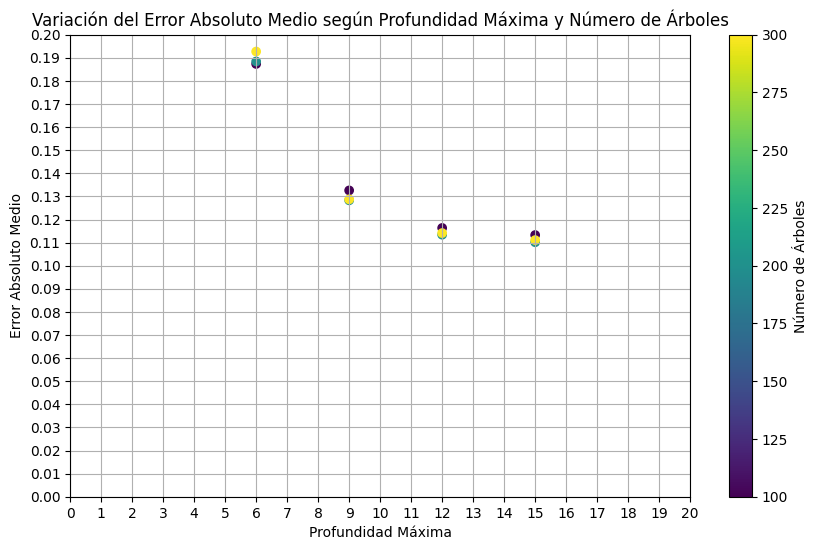

In [ ]:
# Lista de combinaciones de hiperparámetros y resultados correspondientes
hyperparameters_list = [
    (100, 6, results_prueba001[1]),
    (100, 9, results_prueba002[1]),
    (100, 12, results_prueba003[1]),
    (100, 15, results_prueba004[1]),
    (100, None, results_prueba005[1]),
    (200, 6, results_prueba006[1]),
    (200, 9, results_prueba007[1]),
    (200, 12, results_prueba008[1]),
    (200, 15, results_prueba009[1]),
    (200, None, results_prueba010[1]),
    (300, 6, results_prueba011[1]),
    (300, 9, results_prueba012[1]),
    (300, 12, results_prueba013[1]),
    (300, 15, results_prueba014[1]),
    (300, None, results_prueba015[1])
]

# Extraer hiperparámetros y resultados
num_trees = [item[0] for item in hyperparameters_list]
max_depth = [item[1] for item in hyperparameters_list]
mean_absolute_error = [item[2] for item in hyperparameters_list]

# Crear gráfico de dispersión con colores distintos para cada valor de num_trees
plt.figure(figsize=(10, 6))
plt.scatter(max_depth, mean_absolute_error, c=num_trees, cmap='viridis', marker='o')
plt.colorbar(label='Número de Árboles')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Error Absoluto Medio')
plt.xticks(range(0, 21, 1))
plt.yticks([i * 0.01 for i in range(0, 21)])
plt.title('Variación del Error Absoluto Medio según Profundidad Máxima y Número de Árboles')
plt.grid(True)
plt.show()



In [ ]:
# Encontrar el valor mínimo de mean_absolute_error y su índice
min_error_value = min(mean_absolute_error)
min_error_index = mean_absolute_error.index(min_error_value)

# Imprimir el valor mínimo y su posición
print("Valor mínimo de mean_absolute_error:", min_error_value)
print("Posición en la lista hyperparameters_list:", min_error_index+1)

# Obtener la pérdida y la métrica principal de los resultados
loss = results_prueba009[0]
main_metric = results_prueba009[1]

# Imprimir los resultados de la evaluación
print("-Resultados de evaluación-")
print("Loss:", loss)
print("Main Metric:", main_metric)

Valor mínimo de mean_absolute_error: 0.1101691797375679
Posición en la lista hyperparameters_list: 9
-Resultados de evaluación-
Loss: 0.0
Main Metric: 0.1101691797375679


In [95]:
# Evaluar el modelo prueba009 en el conjunto de datos de prueba
results_prueba009 = evaluate_model(prueba009, test_ds)
print("Results for prueba009:", results_prueba009)

11/11 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - mean_absolute_error: 0.1102
Results for prueba009: [0.0, 0.1101691797375679]


In [97]:
# Realizar predicciones en el conjunto de prueba para prueba009
y_pred_perc_prueba009 = prueba009.predict(test_ds) # Obtener las predicciones como probabilidades

# Imprimir los resultados de las predicciones antes de aplicar el umbral
print("Resultados de las predicciones antes del umbral para prueba009:")
print(y_pred_perc_prueba009)

# Aplicar el umbral de 0.70 y convertir las probabilidades a etiquetas binarias para prueba009
umbral = 0.70
y_pred_prueba009 = (y_pred_perc_prueba009 > umbral).astype(int)

# Imprimir los resultados de las predicciones después de aplicar el umbral para prueba009
print("Resultados de las predicciones después del umbral para prueba009:")
print(y_pred_prueba009)

# Calcula el porcentaje de predicciones positivas para prueba009
porcentaje_predicciones_positivas_prueba009 = y_pred_prueba009.mean()

# Calcula el porcentaje de predicciones negativas para prueba009
porcentaje_predicciones_negativas_prueba009 = 1 - porcentaje_predicciones_positivas_prueba009

# Imprime los resultados para prueba009
print("Porcentaje de predicciones positivas para prueba009: {:.2%}".format(porcentaje_predicciones_positivas_prueba009))
print("Porcentaje de predicciones negativas para prueba009: {:.2%}".format(porcentaje_predicciones_negativas_prueba009))


11/11 [==============================] - 0s 17ms/step
Resultados de las predicciones antes del umbral para prueba009:
[[0.04298359]
 [1.2118729 ]
 [0.24259414]
 ...
 [0.8904185 ]
 [0.03110856]
 [0.10083224]]
Resultados de las predicciones después del umbral para prueba009:
[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]
Porcentaje de predicciones positivas para prueba009: 39.86%
Porcentaje de predicciones negativas para prueba009: 60.14%


Conclusión del modelo:

Se llevaron a cabo 15 pruebas utilizando distintas combinaciones de hiperparámetros para el modelo Random Forest en la predicción de ventas globales de videojuegos. Tras evaluar los resultados de cada prueba en el conjunto de datos de prueba, se identificó que la prueba número 9 mostró el mejor rendimiento en términos de Error Absoluto Medio (mean_absolute_error), obteniendo un valor mínimo de 0.1102. Esta métrica es crucial, ya que cuánto más cercano a cero sea el Error Absoluto Medio, mejor será el modelo en la predicción de las ventas.

El conjunto de hiperparámetros que condujo a este buen desempeño fue una configuración de 200 árboles con una profundidad máxima de 15. Esta elección se basó en la capacidad de este modelo para minimizar el error entre las predicciones y los valores reales de las ventas globales de videojuegos.

Al aplicar un umbral de 0.70 a las probabilidades de predicción, se convirtieron en etiquetas binarias. Esto permitió observar que aproximadamente el 39.86% de las predicciones se clasificaron como positivas (1), lo que significa que el modelo predijo correctamente un aumento en las ventas globales, y el 60.14% se clasificaron como negativas (0), lo que indica que el modelo predijo correctamente una disminución en las ventas globales.

En resumen, el modelo de Random Forest con los hiperparámetros específicos de la prueba número 9 demostró un rendimiento sobresaliente en la predicción de ventas globales de videojuegos. El bajo Error Absoluto Medio y la distribución equilibrada de predicciones positivas y negativas son indicativos de la precisión y utilidad del modelo en este contexto.

Nota: La elección del mejor modelo se basó en la métrica de Error Absoluto Medio, pero otros factores, como la interpretación de características y la complejidad del modelo, también deben considerarse al tomar una decisión final.